In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [17]:
from notebook_utils import *
from generate_embedding import *
from sklearn.manifold import TSNE

In [4]:
ppty_vector_train = pd.read_csv("ten_genes/train/property_vector_beforekpca_p=1,T=2_notnormalized_2021-03-17.csv", sep="\t")

In [5]:
ppty_vector_train.head()

,patient_ID,0,1,2,3,4,5,6,7,8,9
0,249600,0.488144,0.000000,0.555470,0.000000,0.705700,0.606109,0.000000,0.542344,0.309716,0.714946
1,441891,0.000000,0.329614,0.534778,0.000000,0.000000,0.000000,0.000000,0.000000,0.297803,0.000000
2,22476,0.363545,0.421707,0.000000,0.528316,0.680688,0.000000,0.000000,0.487622,0.252455,0.669593
3,249532,0.000000,0.436158,0.000000,0.617129,0.726364,0.000000,0.333512,0.000000,0.450651,0.701314
4,305173,0.544102,0.419760,0.000000,0.561252,0.595294,0.584895,0.000000,0.472579,0.000000,0.000000


In [6]:
ppty_vector_test = pd.read_csv("ten_genes/test/property_vector_beforekpca_p=1,T=2_notnormalized_2021-03-17.csv", sep="\t")

In [7]:
ppty_vector_test.head()

,patient_ID,0,1,2,3,4,5,6,7,8,9
0,441736,0.000000,0.000000,0.000000,0.212291,0.000000,0.000000,0.000000,0.000000,0.461443,0.0
1,249665,0.000000,0.169814,0.553588,0.225170,0.000000,0.000000,0.712405,0.290997,0.466958,0.0
2,305252,0.559273,0.398441,0.557303,0.377897,0.000000,0.621935,0.632236,0.407456,0.000000,0.0
3,305153,0.519831,0.429194,0.000000,0.535496,0.298370,0.621935,0.632236,0.000000,0.000000,0.0
4,305171,0.000000,0.160203,0.000000,0.454034,0.421738,0.621935,0.632236,0.000000,0.510684,0.0


In [9]:
train_set = ppty_vector_train["patient_ID"].tolist() 
test_set = ppty_vector_test["patient_ID"].tolist()

In [ ]:
# embedding  

In [10]:
emb_train = do_kpca(ppty_vector_train)
emb_test = do_kpca(ppty_vector_test, test_data=True, vector_space=ppty_vector_train)

--- Doing KPCA
--- Doing KPCA
Train data:(448, 11), Test data:(193, 11)
--- Test data : (193, 448)


In [12]:
outcome = pd.read_csv("/var/www/datasets/state_and_outcome.csv")
outcome = outcome[["posOutcome","patient_ID"]]

Text(0.5, 1.0, 'Test embedding using training data as vector space (Tanimoto similarity)')

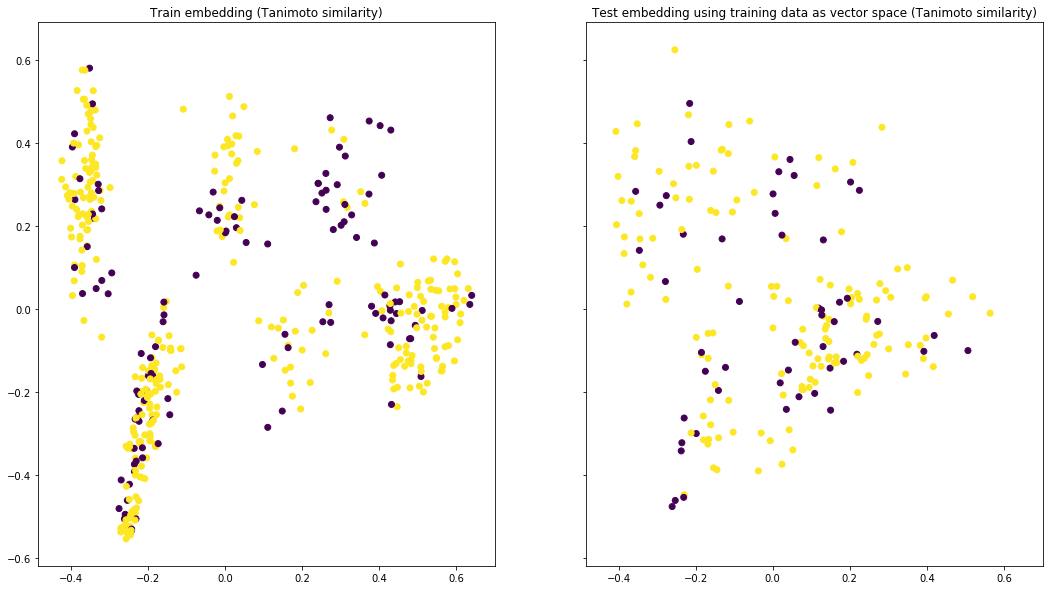

In [22]:
train_emb_plot = pd.merge(emb_train, outcome[outcome["patient_ID"].isin(emb_train["patient_ID"])], on="patient_ID")
test_emb_plot = pd.merge(emb_test, outcome[outcome["patient_ID"].isin(emb_test["patient_ID"])], on="patient_ID")

fig, axs = plt.subplots(1, 2, figsize=(18,10), sharex='all', sharey='all')
ax1, ax2 = axs[0], axs[1]

ax1.scatter(train_emb_plot[0], train_emb_plot[1], c = train_emb_plot["posOutcome"])
ax2.scatter(test_emb_plot[0], test_emb_plot[1],c = test_emb_plot["posOutcome"])
ax1.set_title('Train embedding (Tanimoto similarity)')
ax2.set_title('Test embedding using training data as vector space (Tanimoto similarity)')

In [ ]:
# do Prediction 

In [18]:
emb_all = pd.merge(emb_train.append(emb_test), outcome, on="patient_ID")
emb_all = emb_all.dropna()
result = find_best_dim(emb_all.set_index("patient_ID").astype("float64"),scoring="balanced_accuracy", scale_pos_weight=True, train_set=train_set, test_set=test_set)

------------ Dimention 2
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.8s



 Time taken: 0 hours 0 minutes and 1.62 seconds.
Best Score: 65.695%
{'learning_rate': 0.01, 'max_delta_step': 5, 'n_estimators': 400, 'max_depth': 6, 'scale_pos_weight': 0.36, 'subsample': 0.6, 'min_child_weight': 3, 'colsample_bytree': 1.0, 'gamma': 1.5}


[Parallel(n_jobs=12)]: Done 102 out of 125 | elapsed:    1.4s remaining:    0.3s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.6s finished


--- Validation score
balanced_accuracy    0.656952
recall_0             0.591667
precision_0          0.439959
recall_1             0.722238
precision_1          0.827871
auc                  0.683130
dtype: float64
tn: 26, fp:25, fn:59, tp:83
[[26 25]
 [59 83]]
--- Test score
balanced_accuracy      0.547155
recall_0               0.509804
precision_0            0.305882
recall_1               0.584507
precision_1            0.768519
auc                    0.530931
False_positive_rate    0.490196
False_negative_rate    0.415493
dtype: float64
------------ Dimention 3
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.2s



 Time taken: 0 hours 0 minutes and 1.48 seconds.
Best Score: 64.036%
{'learning_rate': 0.02, 'max_delta_step': 5, 'n_estimators': 700, 'max_depth': 4, 'scale_pos_weight': 0.36, 'subsample': 0.8, 'min_child_weight': 4, 'colsample_bytree': 0.8, 'gamma': 1}


[Parallel(n_jobs=12)]: Done 102 out of 125 | elapsed:    1.0s remaining:    0.2s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished


--- Validation score
balanced_accuracy    0.640355
recall_0             0.558333
precision_0          0.423503
recall_1             0.722378
precision_1          0.818356
auc                  0.666702
dtype: float64
tn: 20, fp:31, fn:53, tp:89
[[20 31]
 [53 89]]
--- Test score
balanced_accuracy      0.509459
recall_0               0.392157
precision_0            0.273973
recall_1               0.626761
precision_1            0.741667
auc                    0.494200
False_positive_rate    0.607843
False_negative_rate    0.373239
dtype: float64
------------ Dimention 4
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 102 out of 125 | elapsed:    1.1s remaining:    0.3s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    1.3s finished



 Time taken: 0 hours 0 minutes and 1.76 seconds.
Best Score: 73.069%
{'learning_rate': 0.02, 'max_delta_step': 5, 'n_estimators': 700, 'max_depth': 4, 'scale_pos_weight': 0.36, 'subsample': 0.8, 'min_child_weight': 4, 'colsample_bytree': 0.8, 'gamma': 1}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished


--- Validation score
balanced_accuracy    0.730693
recall_0             0.675000
precision_0          0.537548
recall_1             0.786387
precision_1          0.870288
auc                  0.772354
dtype: float64
tn: 22, fp:29, fn:57, tp:85
[[22 29]
 [57 85]]
--- Test score
balanced_accuracy      0.514982
recall_0               0.431373
precision_0            0.278481
recall_1               0.598592
precision_1            0.745614
auc                    0.511461
False_positive_rate    0.568627
False_negative_rate    0.401408
dtype: float64
------------ Dimention 5
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 102 out of 125 | elapsed:    1.2s remaining:    0.3s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    1.3s finished



 Time taken: 0 hours 0 minutes and 1.84 seconds.
Best Score: 71.928%
{'learning_rate': 0.02, 'max_delta_step': 5, 'n_estimators': 700, 'max_depth': 4, 'scale_pos_weight': 0.36, 'subsample': 0.8, 'min_child_weight': 4, 'colsample_bytree': 0.8, 'gamma': 1}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.6s finished


--- Validation score
balanced_accuracy    0.719283
recall_0             0.658333
precision_0          0.516946
recall_1             0.780233
precision_1          0.864106
auc                  0.771989
dtype: float64
tn: 24, fp:27, fn:46, tp:96
[[24 27]
 [46 96]]
--- Test score
balanced_accuracy      0.573322
recall_0               0.470588
precision_0            0.342857
recall_1               0.676056
precision_1            0.780488
auc                    0.524579
False_positive_rate    0.529412
False_negative_rate    0.323944
dtype: float64
------------ Dimention 6
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 102 out of 125 | elapsed:    1.2s remaining:    0.3s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    1.3s finished



 Time taken: 0 hours 0 minutes and 1.77 seconds.
Best Score: 69.672%
{'learning_rate': 0.02, 'max_delta_step': 2, 'n_estimators': 300, 'max_depth': 6, 'scale_pos_weight': 0.36, 'subsample': 0.8, 'min_child_weight': 2, 'colsample_bytree': 0.8, 'gamma': 5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished


--- Validation score
balanced_accuracy    0.696725
recall_0             0.716667
precision_0          0.445664
recall_1             0.676783
precision_1          0.872551
auc                  0.763202
dtype: float64
tn: 23, fp:28, fn:60, tp:82
[[23 28]
 [60 82]]
--- Test score
balanced_accuracy      0.514223
recall_0               0.450980
precision_0            0.277108
recall_1               0.577465
precision_1            0.745455
auc                    0.555095
False_positive_rate    0.549020
False_negative_rate    0.422535
dtype: float64
------------ Dimention 7
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 102 out of 125 | elapsed:    1.2s remaining:    0.3s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    1.4s finished



 Time taken: 0 hours 0 minutes and 1.95 seconds.
Best Score: 69.592%
{'learning_rate': 0.02, 'max_delta_step': 2, 'n_estimators': 300, 'max_depth': 6, 'scale_pos_weight': 0.36, 'subsample': 0.8, 'min_child_weight': 2, 'colsample_bytree': 0.8, 'gamma': 5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.6s finished


--- Validation score
balanced_accuracy    0.695921
recall_0             0.700000
precision_0          0.452407
recall_1             0.691841
precision_1          0.865426
auc                  0.766009
dtype: float64
tn: 24, fp:27, fn:60, tp:82
[[24 27]
 [60 82]]
--- Test score
balanced_accuracy      0.524027
recall_0               0.470588
precision_0            0.285714
recall_1               0.577465
precision_1            0.752294
auc                    0.553714
False_positive_rate    0.529412
False_negative_rate    0.422535
dtype: float64
------------ Dimention 8
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 102 out of 125 | elapsed:    1.4s remaining:    0.3s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    1.6s finished



 Time taken: 0 hours 0 minutes and 2.15 seconds.
Best Score: 70.080%
{'learning_rate': 0.02, 'max_delta_step': 2, 'n_estimators': 300, 'max_depth': 6, 'scale_pos_weight': 0.36, 'subsample': 0.8, 'min_child_weight': 2, 'colsample_bytree': 0.8, 'gamma': 5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished


--- Validation score
balanced_accuracy    0.700798
recall_0             0.725000
precision_0          0.450674
recall_1             0.676597
precision_1          0.872500
auc                  0.767215
dtype: float64
tn: 23, fp:28, fn:61, tp:81
[[23 28]
 [61 81]]
--- Test score
balanced_accuracy      0.510701
recall_0               0.450980
precision_0            0.273810
recall_1               0.570423
precision_1            0.743119
auc                    0.542530
False_positive_rate    0.549020
False_negative_rate    0.429577
dtype: float64
------------ Dimention 9
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.3s



 Time taken: 0 hours 0 minutes and 2.15 seconds.
Best Score: 70.593%
{'learning_rate': 0.02, 'max_delta_step': 2, 'n_estimators': 300, 'max_depth': 6, 'scale_pos_weight': 0.36, 'subsample': 0.8, 'min_child_weight': 2, 'colsample_bytree': 0.8, 'gamma': 5}


[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    1.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished


--- Validation score
balanced_accuracy    0.705932
recall_0             0.716667
precision_0          0.461654
recall_1             0.695198
precision_1          0.874960
auc                  0.767377
dtype: float64
tn: 24, fp:27, fn:61, tp:81
[[24 27]
 [61 81]]
--- Test score
balanced_accuracy      0.520505
recall_0               0.470588
precision_0            0.282353
recall_1               0.570423
precision_1            0.750000
auc                    0.542323
False_positive_rate    0.529412
False_negative_rate    0.429577
dtype: float64
------------ Dimention 10
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.4s



 Time taken: 0 hours 0 minutes and 2.25 seconds.
Best Score: 69.138%
{'learning_rate': 0.02, 'max_delta_step': 2, 'n_estimators': 300, 'max_depth': 6, 'scale_pos_weight': 0.36, 'subsample': 0.8, 'min_child_weight': 2, 'colsample_bytree': 0.8, 'gamma': 5}


[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    1.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished


--- Validation score
balanced_accuracy    0.691375
recall_0             0.700000
precision_0          0.445921
recall_1             0.682751
precision_1          0.863166
auc                  0.760748
dtype: float64
tn: 24, fp:27, fn:59, tp:83
[[24 27]
 [59 83]]
--- Test score
balanced_accuracy      0.527548
recall_0               0.470588
precision_0            0.289157
recall_1               0.584507
precision_1            0.754545
auc                    0.551160
False_positive_rate    0.529412
False_negative_rate    0.415493
dtype: float64
------------ Dimention 11
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.4s



 Time taken: 0 hours 0 minutes and 2.37 seconds.
Best Score: 69.969%
{'learning_rate': 0.02, 'max_delta_step': 4, 'n_estimators': 500, 'max_depth': 5, 'scale_pos_weight': 0.36, 'subsample': 0.6, 'min_child_weight': 4, 'colsample_bytree': 1.0, 'gamma': 5}


[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    1.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished


--- Validation score
balanced_accuracy    0.699685
recall_0             0.716667
precision_0          0.449913
recall_1             0.682704
precision_1          0.870635
auc                  0.752642
dtype: float64
tn: 22, fp:29, fn:51, tp:91
[[22 29]
 [51 91]]
--- Test score
balanced_accuracy      0.536109
recall_0               0.431373
precision_0            0.301370
recall_1               0.640845
precision_1            0.758333
auc                    0.574151
False_positive_rate    0.568627
False_negative_rate    0.359155
dtype: float64
------------ Dimention 12
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.4s



 Time taken: 0 hours 0 minutes and 2.33 seconds.
Best Score: 70.037%
{'learning_rate': 0.02, 'max_delta_step': 4, 'n_estimators': 500, 'max_depth': 5, 'scale_pos_weight': 0.36, 'subsample': 0.6, 'min_child_weight': 4, 'colsample_bytree': 1.0, 'gamma': 5}


[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.6s finished


--- Validation score
balanced_accuracy    0.700373
recall_0             0.733333
precision_0          0.445558
recall_1             0.667413
precision_1          0.873600
auc                  0.747815
dtype: float64
tn: 22, fp:29, fn:53, tp:89
[[22 29]
 [53 89]]
--- Test score
balanced_accuracy      0.529067
recall_0               0.431373
precision_0            0.293333
recall_1               0.626761
precision_1            0.754237
auc                    0.567799
False_positive_rate    0.568627
False_negative_rate    0.373239
dtype: float64
------------ Dimention 13
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.3s



 Time taken: 0 hours 0 minutes and 2.45 seconds.
Best Score: 71.410%
{'learning_rate': 0.02, 'max_delta_step': 2, 'n_estimators': 300, 'max_depth': 6, 'scale_pos_weight': 0.36, 'subsample': 0.8, 'min_child_weight': 2, 'colsample_bytree': 0.8, 'gamma': 5}


[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.6s finished


--- Validation score
balanced_accuracy    0.714103
recall_0             0.733333
precision_0          0.466988
recall_1             0.694872
precision_1          0.878730
auc                  0.759742
dtype: float64
tn: 23, fp:28, fn:55, tp:87
[[23 28]
 [55 87]]
--- Test score
balanced_accuracy      0.531828
recall_0               0.450980
precision_0            0.294872
recall_1               0.612676
precision_1            0.756522
auc                    0.553922
False_positive_rate    0.549020
False_negative_rate    0.387324
dtype: float64
------------ Dimention 14
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.4s



 Time taken: 0 hours 0 minutes and 2.69 seconds.
Best Score: 69.886%
{'learning_rate': 0.07, 'max_delta_step': 4, 'n_estimators': 500, 'max_depth': 5, 'scale_pos_weight': 0.2, 'subsample': 0.8, 'min_child_weight': 5, 'colsample_bytree': 1.0, 'gamma': 1.5}


[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    2.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished


--- Validation score
balanced_accuracy    0.698858
recall_0             0.766667
precision_0          0.431125
recall_1             0.631049
precision_1          0.882678
auc                  0.737531
dtype: float64
tn: 24, fp:27, fn:63, tp:79
[[24 27]
 [63 79]]
--- Test score
balanced_accuracy      0.513463
recall_0               0.470588
precision_0            0.275862
recall_1               0.556338
precision_1            0.745283
auc                    0.509666
False_positive_rate    0.529412
False_negative_rate    0.443662
dtype: float64
------------ Dimention 15
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.4s



 Time taken: 0 hours 0 minutes and 2.75 seconds.
Best Score: 69.715%
{'learning_rate': 0.02, 'max_delta_step': 2, 'n_estimators': 300, 'max_depth': 6, 'scale_pos_weight': 0.36, 'subsample': 0.8, 'min_child_weight': 2, 'colsample_bytree': 0.8, 'gamma': 5}


[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.6s finished


--- Validation score
balanced_accuracy    0.697150
recall_0             0.675000
precision_0          0.465823
recall_1             0.719301
precision_1          0.859603
auc                  0.763246
dtype: float64
tn: 24, fp:27, fn:54, tp:88
[[24 27]
 [54 88]]
--- Test score
balanced_accuracy      0.545153
recall_0               0.470588
precision_0            0.307692
recall_1               0.619718
precision_1            0.765217
auc                    0.565797
False_positive_rate    0.529412
False_negative_rate    0.380282
dtype: float64
------------ Dimention 16
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.4s



 Time taken: 0 hours 0 minutes and 2.7 seconds.
Best Score: 70.551%
{'learning_rate': 0.02, 'max_delta_step': 2, 'n_estimators': 300, 'max_depth': 6, 'scale_pos_weight': 0.36, 'subsample': 0.8, 'min_child_weight': 2, 'colsample_bytree': 0.8, 'gamma': 5}


[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.6s finished


--- Validation score
balanced_accuracy    0.705507
recall_0             0.691667
precision_0          0.469118
recall_1             0.719347
precision_1          0.867397
auc                  0.763395
dtype: float64
tn: 24, fp:27, fn:53, tp:89
[[24 27]
 [53 89]]
--- Test score
balanced_accuracy      0.548674
recall_0               0.470588
precision_0            0.311688
recall_1               0.626761
precision_1            0.767241
auc                    0.547225
False_positive_rate    0.529412
False_negative_rate    0.373239
dtype: float64
------------ Dimention 17
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    2.3s finished



 Time taken: 0 hours 0 minutes and 2.85 seconds.
Best Score: 69.793%
{'learning_rate': 0.02, 'max_delta_step': 4, 'n_estimators': 500, 'max_depth': 5, 'scale_pos_weight': 0.36, 'subsample': 0.6, 'min_child_weight': 4, 'colsample_bytree': 1.0, 'gamma': 5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.6s finished


--- Validation score
balanced_accuracy    0.697931
recall_0             0.691667
precision_0          0.454142
recall_1             0.704196
precision_1          0.866396
auc                  0.749984
dtype: float64
tn: 23, fp:28, fn:56, tp:86
[[23 28]
 [56 86]]
--- Test score
balanced_accuracy      0.528307
recall_0               0.450980
precision_0            0.291139
recall_1               0.605634
precision_1            0.754386
auc                    0.553438
False_positive_rate    0.549020
False_negative_rate    0.394366
dtype: float64
------------ Dimention 18
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.4s



 Time taken: 0 hours 0 minutes and 2.92 seconds.
Best Score: 70.397%
{'learning_rate': 0.02, 'max_delta_step': 2, 'n_estimators': 300, 'max_depth': 6, 'scale_pos_weight': 0.36, 'subsample': 0.8, 'min_child_weight': 2, 'colsample_bytree': 0.8, 'gamma': 5}


[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.6s finished


--- Validation score
balanced_accuracy    0.703969
recall_0             0.691667
precision_0          0.469286
recall_1             0.716270
precision_1          0.865231
auc                  0.761448
dtype: float64
tn: 25, fp:26, fn:52, tp:90
[[25 26]
 [52 90]]
--- Test score
balanced_accuracy      0.561999
recall_0               0.490196
precision_0            0.324675
recall_1               0.633803
precision_1            0.775862
auc                    0.575739
False_positive_rate    0.509804
False_negative_rate    0.366197
dtype: float64
------------ Dimention 19
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.5s



 Time taken: 0 hours 0 minutes and 2.83 seconds.
Best Score: 68.406%
{'learning_rate': 0.07, 'max_delta_step': 2, 'n_estimators': 300, 'max_depth': 3, 'scale_pos_weight': 0.2, 'subsample': 0.6, 'min_child_weight': 1, 'colsample_bytree': 0.8, 'gamma': 0.5}


[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished


--- Validation score
balanced_accuracy    0.684056
recall_0             0.600000
precision_0          0.481802
recall_1             0.768112
precision_1          0.841470
auc                  0.726682
dtype: float64
tn: 23, fp:28, fn:50, tp:92
[[23 28]
 [50 92]]
--- Test score
balanced_accuracy      0.549434
recall_0               0.450980
precision_0            0.315068
recall_1               0.647887
precision_1            0.766667
auc                    0.549986
False_positive_rate    0.549020
False_negative_rate    0.352113
dtype: float64
------------ Dimention 20
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    2.4s finished



 Time taken: 0 hours 0 minutes and 3.15 seconds.
Best Score: 68.044%
{'learning_rate': 0.02, 'max_delta_step': 4, 'n_estimators': 500, 'max_depth': 5, 'scale_pos_weight': 0.36, 'subsample': 0.6, 'min_child_weight': 4, 'colsample_bytree': 1.0, 'gamma': 5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.6s finished


--- Validation score
balanced_accuracy    0.680437
recall_0             0.675000
precision_0          0.435959
recall_1             0.685874
precision_1          0.855176
auc                  0.750721
dtype: float64
tn: 21, fp:30, fn:51, tp:91
[[21 30]
 [51 91]]
--- Test score
balanced_accuracy      0.526305
recall_0               0.411765
precision_0            0.291667
recall_1               0.640845
precision_1            0.752066
auc                    0.563933
False_positive_rate    0.588235
False_negative_rate    0.359155
dtype: float64
------------ Dimention 21
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    2.4s finished



 Time taken: 0 hours 0 minutes and 3.09 seconds.
Best Score: 68.526%
{'learning_rate': 0.03, 'max_delta_step': 2, 'n_estimators': 600, 'max_depth': 5, 'scale_pos_weight': 1, 'subsample': 1.0, 'min_child_weight': 4, 'colsample_bytree': 0.8, 'gamma': 1}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.7s finished


--- Validation score
balanced_accuracy    0.685256
recall_0             0.450000
precision_0          0.679372
recall_1             0.920513
precision_1          0.820813
auc                  0.736772
dtype: float64
tn: 12, fp:39, fn:25, tp:117
[[ 12  39]
 [ 25 117]]
--- Test score
balanced_accuracy      0.529619
recall_0               0.235294
precision_0            0.324324
recall_1               0.823944
precision_1            0.750000
auc                    0.518779
False_positive_rate    0.764706
False_negative_rate    0.176056
dtype: float64
------------ Dimention 22
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.5s



 Time taken: 0 hours 0 minutes and 3.3 seconds.
Best Score: 70.569%
{'learning_rate': 0.07, 'max_delta_step': 1, 'n_estimators': 600, 'max_depth': 5, 'scale_pos_weight': 1, 'subsample': 0.8, 'min_child_weight': 5, 'colsample_bytree': 0.6, 'gamma': 1}


[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.6s finished


--- Validation score
balanced_accuracy    0.705688
recall_0             0.500000
precision_0          0.665966
recall_1             0.911375
precision_1          0.833237
auc                  0.742119
dtype: float64
tn: 17, fp:34, fn:28, tp:114
[[ 17  34]
 [ 28 114]]
--- Test score
balanced_accuracy      0.568075
recall_0               0.333333
precision_0            0.377778
recall_1               0.802817
precision_1            0.770270
auc                    0.553438
False_positive_rate    0.666667
False_negative_rate    0.197183
dtype: float64
------------ Dimention 23
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    2.7s finished



 Time taken: 0 hours 0 minutes and 3.25 seconds.
Best Score: 69.997%
{'learning_rate': 0.01, 'max_delta_step': 5, 'n_estimators': 400, 'max_depth': 6, 'scale_pos_weight': 0.36, 'subsample': 0.6, 'min_child_weight': 3, 'colsample_bytree': 1.0, 'gamma': 1.5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.6s finished


--- Validation score
balanced_accuracy    0.699965
recall_0             0.616667
precision_0          0.507887
recall_1             0.783263
precision_1          0.848624
auc                  0.768728
dtype: float64
tn: 22, fp:29, fn:39, tp:103
[[ 22  29]
 [ 39 103]]
--- Test score
balanced_accuracy      0.578362
recall_0               0.431373
precision_0            0.360656
recall_1               0.725352
precision_1            0.780303
auc                    0.528998
False_positive_rate    0.568627
False_negative_rate    0.274648
dtype: float64
------------ Dimention 24
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    2.7s finished



 Time taken: 0 hours 0 minutes and 3.33 seconds.
Best Score: 68.766%
{'learning_rate': 0.02, 'max_delta_step': 2, 'n_estimators': 300, 'max_depth': 6, 'scale_pos_weight': 0.36, 'subsample': 0.8, 'min_child_weight': 2, 'colsample_bytree': 0.8, 'gamma': 5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.6s finished


--- Validation score
balanced_accuracy    0.687657
recall_0             0.650000
precision_0          0.461701
recall_1             0.725315
precision_1          0.851425
auc                  0.762846
dtype: float64
tn: 24, fp:27, fn:57, tp:85
[[24 27]
 [57 85]]
--- Test score
balanced_accuracy      0.534590
recall_0               0.470588
precision_0            0.296296
recall_1               0.598592
precision_1            0.758929
auc                    0.557305
False_positive_rate    0.529412
False_negative_rate    0.401408
dtype: float64
------------ Dimention 25
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    2.8s finished



 Time taken: 0 hours 0 minutes and 3.51 seconds.
Best Score: 69.038%
{'learning_rate': 0.02, 'max_delta_step': 2, 'n_estimators': 300, 'max_depth': 6, 'scale_pos_weight': 0.36, 'subsample': 0.8, 'min_child_weight': 2, 'colsample_bytree': 0.8, 'gamma': 5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.6s finished


--- Validation score
balanced_accuracy    0.690379
recall_0             0.658333
precision_0          0.460675
recall_1             0.722424
precision_1          0.854681
auc                  0.764627
dtype: float64
tn: 23, fp:28, fn:48, tp:94
[[23 28]
 [48 94]]
--- Test score
balanced_accuracy      0.556476
recall_0               0.450980
precision_0            0.323944
recall_1               0.661972
precision_1            0.770492
auc                    0.563311
False_positive_rate    0.549020
False_negative_rate    0.338028
dtype: float64
------------ Dimention 26
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    2.8s finished



 Time taken: 0 hours 0 minutes and 3.61 seconds.
Best Score: 69.291%
{'learning_rate': 0.02, 'max_delta_step': 5, 'n_estimators': 700, 'max_depth': 4, 'scale_pos_weight': 0.36, 'subsample': 0.8, 'min_child_weight': 4, 'colsample_bytree': 0.8, 'gamma': 1}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.7s finished


--- Validation score
balanced_accuracy    0.692908
recall_0             0.575000
precision_0          0.519956
recall_1             0.810816
precision_1          0.840823
auc                  0.758712
dtype: float64
tn: 22, fp:29, fn:44, tp:98
[[22 29]
 [44 98]]
--- Test score
balanced_accuracy      0.560757
recall_0               0.431373
precision_0            0.333333
recall_1               0.690141
precision_1            0.771654
auc                    0.533830
False_positive_rate    0.568627
False_negative_rate    0.309859
dtype: float64
------------ Dimention 27
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    2.9s finished



 Time taken: 0 hours 0 minutes and 3.62 seconds.
Best Score: 70.346%
{'learning_rate': 0.03, 'max_delta_step': 2, 'n_estimators': 600, 'max_depth': 5, 'scale_pos_weight': 1, 'subsample': 1.0, 'min_child_weight': 4, 'colsample_bytree': 0.8, 'gamma': 1}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.7s finished


--- Validation score
balanced_accuracy    0.703462
recall_0             0.483333
precision_0          0.688777
recall_1             0.923590
precision_1          0.830670
auc                  0.762459
dtype: float64
tn: 11, fp:40, fn:21, tp:121
[[ 11  40]
 [ 21 121]]
--- Test score
balanced_accuracy      0.533899
recall_0               0.215686
precision_0            0.343750
recall_1               0.852113
precision_1            0.751553
auc                    0.499448
False_positive_rate    0.784314
False_negative_rate    0.147887
dtype: float64
------------ Dimention 28
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.5s



 Time taken: 0 hours 0 minutes and 3.51 seconds.
Best Score: 70.413%
{'learning_rate': 0.07, 'max_delta_step': 2, 'n_estimators': 300, 'max_depth': 3, 'scale_pos_weight': 0.2, 'subsample': 0.6, 'min_child_weight': 1, 'colsample_bytree': 0.8, 'gamma': 0.5}


[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    2.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.6s finished


--- Validation score
balanced_accuracy    0.704132
recall_0             0.625000
precision_0          0.510787
recall_1             0.783263
precision_1          0.851748
auc                  0.758654
dtype: float64
tn: 21, fp:30, fn:49, tp:93
[[21 30]
 [49 93]]
--- Test score
balanced_accuracy      0.533347
recall_0               0.411765
precision_0            0.300000
recall_1               0.654930
precision_1            0.756098
auc                    0.548191
False_positive_rate    0.588235
False_negative_rate    0.345070
dtype: float64
------------ Dimention 29
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    3.0s finished



 Time taken: 0 hours 0 minutes and 3.7 seconds.
Best Score: 69.758%
{'learning_rate': 0.05, 'max_delta_step': 5, 'n_estimators': 700, 'max_depth': 3, 'scale_pos_weight': 0.2, 'subsample': 1.0, 'min_child_weight': 2, 'colsample_bytree': 0.8, 'gamma': 2}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.7s finished


--- Validation score
balanced_accuracy    0.697582
recall_0             0.791667
precision_0          0.423963
recall_1             0.603497
precision_1          0.890879
auc                  0.759154
dtype: float64
tn: 28, fp:23, fn:74, tp:68
[[28 23]
 [74 68]]
--- Test score
balanced_accuracy      0.513946
recall_0               0.549020
precision_0            0.274510
recall_1               0.478873
precision_1            0.747253
auc                    0.528998
False_positive_rate    0.450980
False_negative_rate    0.521127
dtype: float64
------------ Dimention 30
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.6s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    3.2s finished



 Time taken: 0 hours 0 minutes and 3.87 seconds.
Best Score: 71.273%
{'learning_rate': 0.02, 'max_delta_step': 2, 'n_estimators': 300, 'max_depth': 6, 'scale_pos_weight': 0.36, 'subsample': 0.8, 'min_child_weight': 2, 'colsample_bytree': 0.8, 'gamma': 5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.6s finished


--- Validation score
balanced_accuracy    0.712727
recall_0             0.700000
precision_0          0.479692
recall_1             0.725455
precision_1          0.870175
auc                  0.765453
dtype: float64
tn: 20, fp:31, fn:47, tp:95
[[20 31]
 [47 95]]
--- Test score
balanced_accuracy      0.530585
recall_0               0.392157
precision_0            0.298507
recall_1               0.669014
precision_1            0.753968
auc                    0.547501
False_positive_rate    0.607843
False_negative_rate    0.330986
dtype: float64
------------ Dimention 31
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    3.2s finished



 Time taken: 0 hours 0 minutes and 3.88 seconds.
Best Score: 70.752%
{'learning_rate': 0.02, 'max_delta_step': 2, 'n_estimators': 300, 'max_depth': 6, 'scale_pos_weight': 0.36, 'subsample': 0.8, 'min_child_weight': 2, 'colsample_bytree': 0.8, 'gamma': 5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.7s finished


--- Validation score
balanced_accuracy    0.707517
recall_0             0.683333
precision_0          0.476957
recall_1             0.731702
precision_1          0.866451
auc                  0.765493
dtype: float64
tn: 22, fp:29, fn:50, tp:92
[[22 29]
 [50 92]]
--- Test score
balanced_accuracy      0.539630
recall_0               0.431373
precision_0            0.305556
recall_1               0.647887
precision_1            0.760331
auc                    0.543496
False_positive_rate    0.568627
False_negative_rate    0.352113
dtype: float64
------------ Dimention 32
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.6s



 Time taken: 0 hours 0 minutes and 3.82 seconds.
Best Score: 69.578%
{'learning_rate': 0.07, 'max_delta_step': 2, 'n_estimators': 300, 'max_depth': 3, 'scale_pos_weight': 0.2, 'subsample': 0.6, 'min_child_weight': 1, 'colsample_bytree': 0.8, 'gamma': 0.5}


[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    3.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished


--- Validation score
balanced_accuracy    0.695775
recall_0             0.608333
precision_0          0.503914
recall_1             0.783217
precision_1          0.847274
auc                  0.744986
dtype: float64
tn: 20, fp:31, fn:45, tp:97
[[20 31]
 [45 97]]
--- Test score
balanced_accuracy      0.537628
recall_0               0.392157
precision_0            0.307692
recall_1               0.683099
precision_1            0.757812
auc                    0.527202
False_positive_rate    0.607843
False_negative_rate    0.316901
dtype: float64
------------ Dimention 33
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    3.3s finished



 Time taken: 0 hours 0 minutes and 4.05 seconds.
Best Score: 70.647%
{'learning_rate': 0.02, 'max_delta_step': 5, 'n_estimators': 700, 'max_depth': 4, 'scale_pos_weight': 0.36, 'subsample': 0.8, 'min_child_weight': 4, 'colsample_bytree': 0.8, 'gamma': 1}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s finished


--- Validation score
balanced_accuracy    0.706474
recall_0             0.608333
precision_0          0.529517
recall_1             0.804615
precision_1          0.849949
auc                  0.756402
dtype: float64
tn: 23, fp:28, fn:35, tp:107
[[ 23  28]
 [ 35 107]]
--- Test score
balanced_accuracy      0.602251
recall_0               0.450980
precision_0            0.396552
recall_1               0.753521
precision_1            0.792593
auc                    0.543772
False_positive_rate    0.549020
False_negative_rate    0.246479
dtype: float64
------------ Dimention 34
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    3.4s finished



 Time taken: 0 hours 0 minutes and 4.15 seconds.
Best Score: 71.048%
{'learning_rate': 0.01, 'max_delta_step': 5, 'n_estimators': 400, 'max_depth': 6, 'scale_pos_weight': 0.36, 'subsample': 0.6, 'min_child_weight': 3, 'colsample_bytree': 1.0, 'gamma': 1.5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.7s finished


--- Validation score
balanced_accuracy    0.710478
recall_0             0.650000
precision_0          0.522363
recall_1             0.770956
precision_1          0.856709
auc                  0.772498
dtype: float64
tn: 23, fp:28, fn:37, tp:105
[[ 23  28]
 [ 37 105]]
--- Test score
balanced_accuracy      0.595209
recall_0               0.450980
precision_0            0.383333
recall_1               0.739437
precision_1            0.789474
auc                    0.548743
False_positive_rate    0.549020
False_negative_rate    0.260563
dtype: float64
------------ Dimention 35
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.6s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    3.4s finished



 Time taken: 0 hours 0 minutes and 4.23 seconds.
Best Score: 69.492%
{'learning_rate': 0.01, 'max_delta_step': 5, 'n_estimators': 400, 'max_depth': 6, 'scale_pos_weight': 0.36, 'subsample': 0.6, 'min_child_weight': 3, 'colsample_bytree': 1.0, 'gamma': 1.5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.7s finished


--- Validation score
balanced_accuracy    0.694924
recall_0             0.625000
precision_0          0.504306
recall_1             0.764848
precision_1          0.846652
auc                  0.766360
dtype: float64
tn: 23, fp:28, fn:37, tp:105
[[ 23  28]
 [ 37 105]]
--- Test score
balanced_accuracy      0.595209
recall_0               0.450980
precision_0            0.383333
recall_1               0.739437
precision_1            0.789474
auc                    0.561309
False_positive_rate    0.549020
False_negative_rate    0.260563
dtype: float64
------------ Dimention 36
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.6s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    3.5s finished



 Time taken: 0 hours 0 minutes and 4.21 seconds.
Best Score: 70.257%
{'learning_rate': 0.01, 'max_delta_step': 5, 'n_estimators': 400, 'max_depth': 6, 'scale_pos_weight': 0.36, 'subsample': 0.6, 'min_child_weight': 3, 'colsample_bytree': 1.0, 'gamma': 1.5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.7s finished


--- Validation score
balanced_accuracy    0.702570
recall_0             0.625000
precision_0          0.515484
recall_1             0.780140
precision_1          0.850252
auc                  0.771840
dtype: float64
tn: 23, fp:28, fn:36, tp:106
[[ 23  28]
 [ 36 106]]
--- Test score
balanced_accuracy      0.598730
recall_0               0.450980
precision_0            0.389831
recall_1               0.746479
precision_1            0.791045
auc                    0.539216
False_positive_rate    0.549020
False_negative_rate    0.253521
dtype: float64
------------ Dimention 37
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.6s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    3.5s finished



 Time taken: 0 hours 0 minutes and 4.33 seconds.
Best Score: 71.024%
{'learning_rate': 0.01, 'max_delta_step': 5, 'n_estimators': 400, 'max_depth': 6, 'scale_pos_weight': 0.36, 'subsample': 0.6, 'min_child_weight': 3, 'colsample_bytree': 1.0, 'gamma': 1.5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.4s finished


--- Validation score
balanced_accuracy    0.710239
recall_0             0.625000
precision_0          0.530003
recall_1             0.795478
precision_1          0.853573
auc                  0.771496
dtype: float64
tn: 21, fp:30, fn:35, tp:107
[[ 21  30]
 [ 35 107]]
--- Test score
balanced_accuracy      0.582643
recall_0               0.411765
precision_0            0.375000
recall_1               0.753521
precision_1            0.781022
auc                    0.545568
False_positive_rate    0.588235
False_negative_rate    0.246479
dtype: float64
------------ Dimention 38
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.6s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    3.7s finished



 Time taken: 0 hours 0 minutes and 4.3 seconds.
Best Score: 70.032%
{'learning_rate': 0.01, 'max_delta_step': 5, 'n_estimators': 400, 'max_depth': 3, 'scale_pos_weight': 0.36, 'subsample': 1.0, 'min_child_weight': 1, 'colsample_bytree': 0.6, 'gamma': 1.5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.7s finished


--- Validation score
balanced_accuracy    0.700321
recall_0             0.608333
precision_0          0.524856
recall_1             0.792308
precision_1          0.847841
auc                  0.759384
dtype: float64
tn: 20, fp:31, fn:44, tp:98
[[20 31]
 [44 98]]
--- Test score
balanced_accuracy      0.541149
recall_0               0.392157
precision_0            0.312500
recall_1               0.690141
precision_1            0.759690
auc                    0.554819
False_positive_rate    0.607843
False_negative_rate    0.309859
dtype: float64
------------ Dimention 39
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.6s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    3.8s finished



 Time taken: 0 hours 0 minutes and 4.53 seconds.
Best Score: 70.302%
{'learning_rate': 0.01, 'max_delta_step': 5, 'n_estimators': 400, 'max_depth': 6, 'scale_pos_weight': 0.36, 'subsample': 0.6, 'min_child_weight': 3, 'colsample_bytree': 1.0, 'gamma': 1.5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.7s finished


--- Validation score
balanced_accuracy    0.703019
recall_0             0.616667
precision_0          0.518450
recall_1             0.789371
precision_1          0.849217
auc                  0.769126
dtype: float64
tn: 23, fp:28, fn:36, tp:106
[[ 23  28]
 [ 36 106]]
--- Test score
balanced_accuracy      0.598730
recall_0               0.450980
precision_0            0.389831
recall_1               0.746479
precision_1            0.791045
auc                    0.551643
False_positive_rate    0.549020
False_negative_rate    0.253521
dtype: float64
------------ Dimention 40
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.7s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    3.9s finished



 Time taken: 0 hours 0 minutes and 4.63 seconds.
Best Score: 69.847%
{'learning_rate': 0.01, 'max_delta_step': 5, 'n_estimators': 400, 'max_depth': 6, 'scale_pos_weight': 0.36, 'subsample': 0.6, 'min_child_weight': 3, 'colsample_bytree': 1.0, 'gamma': 1.5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.7s finished


--- Validation score
balanced_accuracy    0.698473
recall_0             0.616667
precision_0          0.507372
recall_1             0.780280
precision_1          0.848762
auc                  0.766911
dtype: float64
tn: 23, fp:28, fn:36, tp:106
[[ 23  28]
 [ 36 106]]
--- Test score
balanced_accuracy      0.598730
recall_0               0.450980
precision_0            0.389831
recall_1               0.746479
precision_1            0.791045
auc                    0.558962
False_positive_rate    0.549020
False_negative_rate    0.253521
dtype: float64
------------ Dimention 41
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.6s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    3.8s finished



 Time taken: 0 hours 0 minutes and 4.59 seconds.
Best Score: 70.411%
{'learning_rate': 0.01, 'max_delta_step': 5, 'n_estimators': 400, 'max_depth': 6, 'scale_pos_weight': 0.36, 'subsample': 0.6, 'min_child_weight': 3, 'colsample_bytree': 1.0, 'gamma': 1.5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s finished


--- Validation score
balanced_accuracy    0.704108
recall_0             0.625000
precision_0          0.514734
recall_1             0.783217
precision_1          0.850910
auc                  0.766909
dtype: float64
tn: 21, fp:30, fn:37, tp:105
[[ 21  30]
 [ 37 105]]
--- Test score
balanced_accuracy      0.575601
recall_0               0.411765
precision_0            0.362069
recall_1               0.739437
precision_1            0.777778
auc                    0.556614
False_positive_rate    0.588235
False_negative_rate    0.260563
dtype: float64
------------ Dimention 42
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.6s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    3.9s finished



 Time taken: 0 hours 0 minutes and 4.77 seconds.
Best Score: 70.456%
{'learning_rate': 0.01, 'max_delta_step': 5, 'n_estimators': 400, 'max_depth': 6, 'scale_pos_weight': 0.36, 'subsample': 0.6, 'min_child_weight': 3, 'colsample_bytree': 1.0, 'gamma': 1.5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.7s finished


--- Validation score
balanced_accuracy    0.704557
recall_0             0.616667
precision_0          0.526632
recall_1             0.792448
precision_1          0.850302
auc                  0.772277
dtype: float64
tn: 23, fp:28, fn:37, tp:105
[[ 23  28]
 [ 37 105]]
--- Test score
balanced_accuracy      0.595209
recall_0               0.450980
precision_0            0.383333
recall_1               0.739437
precision_1            0.789474
auc                    0.555233
False_positive_rate    0.549020
False_negative_rate    0.260563
dtype: float64
------------ Dimention 43
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.6s



 Time taken: 0 hours 0 minutes and 4.6 seconds.
Best Score: 70.235%
{'learning_rate': 0.07, 'max_delta_step': 3, 'n_estimators': 400, 'max_depth': 6, 'scale_pos_weight': 0.36, 'subsample': 0.6, 'min_child_weight': 4, 'colsample_bytree': 0.6, 'gamma': 1.5}


[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    4.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.6s finished


--- Validation score
balanced_accuracy    0.702354
recall_0             0.600000
precision_0          0.534833
recall_1             0.804709
precision_1          0.846027
auc                  0.744530
dtype: float64
tn: 25, fp:26, fn:43, tp:99
[[25 26]
 [43 99]]
--- Test score
balanced_accuracy      0.593690
recall_0               0.490196
precision_0            0.367647
recall_1               0.697183
precision_1            0.792000
auc                    0.578155
False_positive_rate    0.509804
False_negative_rate    0.302817
dtype: float64
------------ Dimention 44
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.7s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    4.1s finished



 Time taken: 0 hours 0 minutes and 4.95 seconds.
Best Score: 70.723%
{'learning_rate': 0.01, 'max_delta_step': 5, 'n_estimators': 400, 'max_depth': 6, 'scale_pos_weight': 0.36, 'subsample': 0.6, 'min_child_weight': 3, 'colsample_bytree': 1.0, 'gamma': 1.5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s finished


--- Validation score
balanced_accuracy    0.707232
recall_0             0.625000
precision_0          0.522886
recall_1             0.789464
precision_1          0.852368
auc                  0.762094
dtype: float64
tn: 23, fp:28, fn:39, tp:103
[[ 23  28]
 [ 39 103]]
--- Test score
balanced_accuracy      0.588166
recall_0               0.450980
precision_0            0.370968
recall_1               0.725352
precision_1            0.786260
auc                    0.565728
False_positive_rate    0.549020
False_negative_rate    0.274648
dtype: float64
------------ Dimention 45
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    4.2s finished



 Time taken: 0 hours 0 minutes and 4.99 seconds.
Best Score: 69.999%
{'learning_rate': 0.01, 'max_delta_step': 5, 'n_estimators': 400, 'max_depth': 6, 'scale_pos_weight': 0.36, 'subsample': 0.6, 'min_child_weight': 3, 'colsample_bytree': 1.0, 'gamma': 1.5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s finished


--- Validation score
balanced_accuracy    0.699988
recall_0             0.616667
precision_0          0.510563
recall_1             0.783310
precision_1          0.848413
auc                  0.769336
dtype: float64
tn: 22, fp:29, fn:39, tp:103
[[ 22  29]
 [ 39 103]]
--- Test score
balanced_accuracy      0.578362
recall_0               0.431373
precision_0            0.360656
recall_1               0.725352
precision_1            0.780303
auc                    0.568489
False_positive_rate    0.568627
False_negative_rate    0.274648
dtype: float64
------------ Dimention 46
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.7s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    4.1s finished



 Time taken: 0 hours 0 minutes and 5.02 seconds.
Best Score: 70.875%
{'learning_rate': 0.01, 'max_delta_step': 5, 'n_estimators': 400, 'max_depth': 6, 'scale_pos_weight': 0.36, 'subsample': 0.6, 'min_child_weight': 3, 'colsample_bytree': 1.0, 'gamma': 1.5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s finished


--- Validation score
balanced_accuracy    0.708747
recall_0             0.625000
precision_0          0.529070
recall_1             0.792494
precision_1          0.852300
auc                  0.767092
dtype: float64
tn: 23, fp:28, fn:38, tp:104
[[ 23  28]
 [ 38 104]]
--- Test score
balanced_accuracy      0.591687
recall_0               0.450980
precision_0            0.377049
recall_1               0.732394
precision_1            0.787879
auc                    0.567109
False_positive_rate    0.549020
False_negative_rate    0.267606
dtype: float64
------------ Dimention 47
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.7s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    4.3s finished



 Time taken: 0 hours 0 minutes and 5.15 seconds.
Best Score: 70.013%
{'learning_rate': 0.02, 'max_delta_step': 5, 'n_estimators': 700, 'max_depth': 4, 'scale_pos_weight': 0.36, 'subsample': 0.8, 'min_child_weight': 4, 'colsample_bytree': 0.8, 'gamma': 1}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s finished


--- Validation score
balanced_accuracy    0.700128
recall_0             0.583333
precision_0          0.543586
recall_1             0.816923
precision_1          0.842829
auc                  0.746946
dtype: float64
tn: 20, fp:31, fn:40, tp:102
[[ 20  31]
 [ 40 102]]
--- Test score
balanced_accuracy      0.555233
recall_0               0.392157
precision_0            0.333333
recall_1               0.718310
precision_1            0.766917
auc                    0.571251
False_positive_rate    0.607843
False_negative_rate    0.281690
dtype: float64
------------ Dimention 48
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.7s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    4.4s finished



 Time taken: 0 hours 0 minutes and 5.24 seconds.
Best Score: 70.399%
{'learning_rate': 0.02, 'max_delta_step': 4, 'n_estimators': 500, 'max_depth': 5, 'scale_pos_weight': 0.36, 'subsample': 0.6, 'min_child_weight': 4, 'colsample_bytree': 1.0, 'gamma': 5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s finished


--- Validation score
balanced_accuracy    0.703992
recall_0             0.691667
precision_0          0.469487
recall_1             0.716317
precision_1          0.865769
auc                  0.758110
dtype: float64
tn: 23, fp:28, fn:49, tp:93
[[23 28]
 [49 93]]
--- Test score
balanced_accuracy      0.552955
recall_0               0.450980
precision_0            0.319444
recall_1               0.654930
precision_1            0.768595
auc                    0.572356
False_positive_rate    0.549020
False_negative_rate    0.345070
dtype: float64
------------ Dimention 49
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.6s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    4.4s finished



 Time taken: 0 hours 0 minutes and 5.19 seconds.
Best Score: 70.195%
{'learning_rate': 0.01, 'max_delta_step': 5, 'n_estimators': 400, 'max_depth': 6, 'scale_pos_weight': 0.36, 'subsample': 0.6, 'min_child_weight': 3, 'colsample_bytree': 1.0, 'gamma': 1.5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s finished


--- Validation score
balanced_accuracy    0.701952
recall_0             0.608333
precision_0          0.521970
recall_1             0.795571
precision_1          0.847827
auc                  0.767723
dtype: float64
tn: 23, fp:28, fn:37, tp:105
[[ 23  28]
 [ 37 105]]
--- Test score
balanced_accuracy      0.595209
recall_0               0.450980
precision_0            0.383333
recall_1               0.739437
precision_1            0.789474
auc                    0.562138
False_positive_rate    0.549020
False_negative_rate    0.260563
dtype: float64
------------ Dimention 50
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.7s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    4.6s finished



 Time taken: 0 hours 0 minutes and 5.56 seconds.
Best Score: 69.620%
{'learning_rate': 0.01, 'max_delta_step': 5, 'n_estimators': 400, 'max_depth': 6, 'scale_pos_weight': 0.36, 'subsample': 0.6, 'min_child_weight': 3, 'colsample_bytree': 1.0, 'gamma': 1.5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s finished


--- Validation score
balanced_accuracy    0.696200
recall_0             0.600000
precision_0          0.515994
recall_1             0.792401
precision_1          0.843739
auc                  0.757514
dtype: float64
tn: 23, fp:28, fn:38, tp:104
[[ 23  28]
 [ 38 104]]
--- Test score
balanced_accuracy      0.591687
recall_0               0.450980
precision_0            0.377049
recall_1               0.732394
precision_1            0.787879
auc                    0.560619
False_positive_rate    0.549020
False_negative_rate    0.267606
dtype: float64
------------ Dimention 51
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.7s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    4.6s finished



 Time taken: 0 hours 0 minutes and 5.49 seconds.
Best Score: 69.464%
{'learning_rate': 0.01, 'max_delta_step': 5, 'n_estimators': 400, 'max_depth': 6, 'scale_pos_weight': 0.36, 'subsample': 0.6, 'min_child_weight': 3, 'colsample_bytree': 1.0, 'gamma': 1.5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s finished


--- Validation score
balanced_accuracy    0.694639
recall_0             0.600000
precision_0          0.517425
recall_1             0.789277
precision_1          0.843414
auc                  0.766082
dtype: float64
tn: 22, fp:29, fn:38, tp:104
[[ 22  29]
 [ 38 104]]
--- Test score
balanced_accuracy      0.581883
recall_0               0.431373
precision_0            0.366667
recall_1               0.732394
precision_1            0.781955
auc                    0.556476
False_positive_rate    0.568627
False_negative_rate    0.267606
dtype: float64
------------ Dimention 52
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    4.6s finished



 Time taken: 0 hours 0 minutes and 5.66 seconds.
Best Score: 69.170%
{'learning_rate': 0.02, 'max_delta_step': 5, 'n_estimators': 700, 'max_depth': 4, 'scale_pos_weight': 0.36, 'subsample': 0.8, 'min_child_weight': 4, 'colsample_bytree': 0.8, 'gamma': 1}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.9s finished


--- Validation score
balanced_accuracy    0.691702
recall_0             0.566667
precision_0          0.531909
recall_1             0.816737
precision_1          0.837843
auc                  0.742168
dtype: float64
tn: 20, fp:31, fn:41, tp:101
[[ 20  31]
 [ 41 101]]
--- Test score
balanced_accuracy      0.551712
recall_0               0.392157
precision_0            0.327869
recall_1               0.711268
precision_1            0.765152
auc                    0.555095
False_positive_rate    0.607843
False_negative_rate    0.288732
dtype: float64
------------ Dimention 53
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    4.7s finished



 Time taken: 0 hours 0 minutes and 5.23 seconds.
Best Score: 70.380%
{'learning_rate': 0.07, 'max_delta_step': 2, 'n_estimators': 300, 'max_depth': 3, 'scale_pos_weight': 0.2, 'subsample': 0.6, 'min_child_weight': 1, 'colsample_bytree': 0.8, 'gamma': 0.5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.6s finished


--- Validation score
balanced_accuracy    0.703800
recall_0             0.600000
precision_0          0.536346
recall_1             0.807599
precision_1          0.846612
auc                  0.739831
dtype: float64
tn: 22, fp:29, fn:43, tp:99
[[22 29]
 [43 99]]
--- Test score
balanced_accuracy      0.564278
recall_0               0.431373
precision_0            0.338462
recall_1               0.697183
precision_1            0.773438
auc                    0.561033
False_positive_rate    0.568627
False_negative_rate    0.302817
dtype: float64
------------ Dimention 54
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    4.7s finished



 Time taken: 0 hours 0 minutes and 5.64 seconds.
Best Score: 70.198%
{'learning_rate': 0.01, 'max_delta_step': 5, 'n_estimators': 400, 'max_depth': 6, 'scale_pos_weight': 0.36, 'subsample': 0.6, 'min_child_weight': 3, 'colsample_bytree': 1.0, 'gamma': 1.5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s finished


--- Validation score
balanced_accuracy    0.701976
recall_0             0.608333
precision_0          0.522320
recall_1             0.795618
precision_1          0.848442
auc                  0.766237
dtype: float64
tn: 23, fp:28, fn:41, tp:101
[[ 23  28]
 [ 41 101]]
--- Test score
balanced_accuracy      0.581124
recall_0               0.450980
precision_0            0.359375
recall_1               0.711268
precision_1            0.782946
auc                    0.570146
False_positive_rate    0.549020
False_negative_rate    0.288732
dtype: float64
------------ Dimention 55
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    4.9s finished



 Time taken: 0 hours 0 minutes and 5.74 seconds.
Best Score: 70.084%
{'learning_rate': 0.01, 'max_delta_step': 5, 'n_estimators': 400, 'max_depth': 6, 'scale_pos_weight': 0.36, 'subsample': 0.6, 'min_child_weight': 3, 'colsample_bytree': 1.0, 'gamma': 1.5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.9s finished


--- Validation score
balanced_accuracy    0.700839
recall_0             0.600000
precision_0          0.522111
recall_1             0.801678
precision_1          0.846871
auc                  0.761002
dtype: float64
tn: 23, fp:28, fn:37, tp:105
[[ 23  28]
 [ 37 105]]
--- Test score
balanced_accuracy      0.595209
recall_0               0.450980
precision_0            0.383333
recall_1               0.739437
precision_1            0.789474
auc                    0.568351
False_positive_rate    0.549020
False_negative_rate    0.260563
dtype: float64
------------ Dimention 56
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.7s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    4.8s finished



 Time taken: 0 hours 0 minutes and 5.8 seconds.
Best Score: 69.116%
{'learning_rate': 0.02, 'max_delta_step': 2, 'n_estimators': 300, 'max_depth': 6, 'scale_pos_weight': 0.36, 'subsample': 0.8, 'min_child_weight': 2, 'colsample_bytree': 0.8, 'gamma': 5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.9s finished


--- Validation score
balanced_accuracy    0.691160
recall_0             0.641667
precision_0          0.477018
recall_1             0.740653
precision_1          0.849701
auc                  0.758708
dtype: float64
tn: 23, fp:28, fn:47, tp:95
[[23 28]
 [47 95]]
--- Test score
balanced_accuracy      0.559997
recall_0               0.450980
precision_0            0.328571
recall_1               0.669014
precision_1            0.772358
auc                    0.560342
False_positive_rate    0.549020
False_negative_rate    0.330986
dtype: float64
------------ Dimention 57
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    5.0s finished



 Time taken: 0 hours 0 minutes and 5.63 seconds.
Best Score: 70.643%
{'learning_rate': 0.07, 'max_delta_step': 2, 'n_estimators': 300, 'max_depth': 3, 'scale_pos_weight': 0.2, 'subsample': 0.6, 'min_child_weight': 1, 'colsample_bytree': 0.8, 'gamma': 0.5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.7s finished


--- Validation score
balanced_accuracy    0.706428
recall_0             0.608333
precision_0          0.534156
recall_1             0.804522
precision_1          0.849445
auc                  0.742125
dtype: float64
tn: 21, fp:30, fn:45, tp:97
[[21 30]
 [45 97]]
--- Test score
balanced_accuracy      0.547432
recall_0               0.411765
precision_0            0.318182
recall_1               0.683099
precision_1            0.763780
auc                    0.537697
False_positive_rate    0.588235
False_negative_rate    0.316901
dtype: float64
------------ Dimention 58
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    5.0s finished



 Time taken: 0 hours 0 minutes and 5.96 seconds.
Best Score: 68.593%
{'learning_rate': 0.01, 'max_delta_step': 5, 'n_estimators': 400, 'max_depth': 6, 'scale_pos_weight': 0.36, 'subsample': 0.6, 'min_child_weight': 3, 'colsample_bytree': 1.0, 'gamma': 1.5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.9s finished


--- Validation score
balanced_accuracy    0.685927
recall_0             0.591667
precision_0          0.494856
recall_1             0.780186
precision_1          0.840137
auc                  0.755458
dtype: float64
tn: 22, fp:29, fn:40, tp:102
[[ 22  29]
 [ 40 102]]
--- Test score
balanced_accuracy      0.574841
recall_0               0.431373
precision_0            0.354839
recall_1               0.718310
precision_1            0.778626
auc                    0.567937
False_positive_rate    0.568627
False_negative_rate    0.281690
dtype: float64
------------ Dimention 59
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    5.2s finished



 Time taken: 0 hours 0 minutes and 5.93 seconds.
Best Score: 68.827%
{'learning_rate': 0.07, 'max_delta_step': 2, 'n_estimators': 300, 'max_depth': 3, 'scale_pos_weight': 0.2, 'subsample': 0.6, 'min_child_weight': 1, 'colsample_bytree': 0.8, 'gamma': 0.5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.7s finished


--- Validation score
balanced_accuracy    0.688269
recall_0             0.575000
precision_0          0.512021
recall_1             0.801538
precision_1          0.838934
auc                  0.734037
dtype: float64
tn: 19, fp:32, fn:43, tp:99
[[19 32]
 [43 99]]
--- Test score
balanced_accuracy      0.534866
recall_0               0.372549
precision_0            0.306452
recall_1               0.697183
precision_1            0.755725
auc                    0.545153
False_positive_rate    0.627451
False_negative_rate    0.302817
dtype: float64
------------ Dimention 60
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    5.3s finished



 Time taken: 0 hours 0 minutes and 6.21 seconds.
Best Score: 69.519%
{'learning_rate': 0.02, 'max_delta_step': 4, 'n_estimators': 500, 'max_depth': 5, 'scale_pos_weight': 0.36, 'subsample': 0.6, 'min_child_weight': 4, 'colsample_bytree': 1.0, 'gamma': 5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.9s finished


--- Validation score
balanced_accuracy    0.695186
recall_0             0.683333
precision_0          0.461280
recall_1             0.707040
precision_1          0.859121
auc                  0.751383
dtype: float64
tn: 23, fp:28, fn:50, tp:92
[[23 28]
 [50 92]]
--- Test score
balanced_accuracy      0.549434
recall_0               0.450980
precision_0            0.315068
recall_1               0.647887
precision_1            0.766667
auc                    0.573737
False_positive_rate    0.549020
False_negative_rate    0.352113
dtype: float64
------------ Dimention 61
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    5.3s finished



 Time taken: 0 hours 0 minutes and 6.34 seconds.
Best Score: 68.145%
{'learning_rate': 0.02, 'max_delta_step': 5, 'n_estimators': 700, 'max_depth': 4, 'scale_pos_weight': 0.36, 'subsample': 0.8, 'min_child_weight': 4, 'colsample_bytree': 0.8, 'gamma': 1}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.0s finished


--- Validation score
balanced_accuracy    0.681451
recall_0             0.558333
precision_0          0.511732
recall_1             0.804569
precision_1          0.833030
auc                  0.722745
dtype: float64
tn: 20, fp:31, fn:36, tp:106
[[ 20  31]
 [ 36 106]]
--- Test score
balanced_accuracy      0.569318
recall_0               0.392157
precision_0            0.357143
recall_1               0.746479
precision_1            0.773723
auc                    0.553714
False_positive_rate    0.607843
False_negative_rate    0.253521
dtype: float64
------------ Dimention 62
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    5.4s finished



 Time taken: 0 hours 0 minutes and 6.33 seconds.
Best Score: 69.094%
{'learning_rate': 0.01, 'max_delta_step': 5, 'n_estimators': 400, 'max_depth': 6, 'scale_pos_weight': 0.36, 'subsample': 0.6, 'min_child_weight': 3, 'colsample_bytree': 1.0, 'gamma': 1.5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.9s finished


--- Validation score
balanced_accuracy    0.690944
recall_0             0.583333
precision_0          0.515227
recall_1             0.798555
precision_1          0.840241
auc                  0.749270
dtype: float64
tn: 23, fp:28, fn:37, tp:105
[[ 23  28]
 [ 37 105]]
--- Test score
balanced_accuracy      0.595209
recall_0               0.450980
precision_0            0.383333
recall_1               0.739437
precision_1            0.789474
auc                    0.545429
False_positive_rate    0.549020
False_negative_rate    0.260563
dtype: float64
------------ Dimention 63
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    5.4s finished



 Time taken: 0 hours 0 minutes and 6.28 seconds.
Best Score: 69.348%
{'learning_rate': 0.02, 'max_delta_step': 2, 'n_estimators': 300, 'max_depth': 6, 'scale_pos_weight': 0.36, 'subsample': 0.8, 'min_child_weight': 2, 'colsample_bytree': 0.8, 'gamma': 5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s finished


--- Validation score
balanced_accuracy    0.693479
recall_0             0.625000
precision_0          0.490831
recall_1             0.761958
precision_1          0.848199
auc                  0.747803
dtype: float64
tn: 23, fp:28, fn:54, tp:88
[[23 28]
 [54 88]]
--- Test score
balanced_accuracy      0.535349
recall_0               0.450980
precision_0            0.298701
recall_1               0.619718
precision_1            0.758621
auc                    0.544325
False_positive_rate    0.549020
False_negative_rate    0.380282
dtype: float64
------------ Dimention 64
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    5.5s finished



 Time taken: 0 hours 0 minutes and 6.27 seconds.
Best Score: 68.441%
{'learning_rate': 0.02, 'max_delta_step': 2, 'n_estimators': 300, 'max_depth': 6, 'scale_pos_weight': 0.36, 'subsample': 0.8, 'min_child_weight': 2, 'colsample_bytree': 0.8, 'gamma': 5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.9s finished


--- Validation score
balanced_accuracy    0.684411
recall_0             0.625000
precision_0          0.469776
recall_1             0.743823
precision_1          0.846523
auc                  0.757622
dtype: float64
tn: 23, fp:28, fn:51, tp:91
[[23 28]
 [51 91]]
--- Test score
balanced_accuracy      0.545913
recall_0               0.450980
precision_0            0.310811
recall_1               0.640845
precision_1            0.764706
auc                    0.571665
False_positive_rate    0.549020
False_negative_rate    0.359155
dtype: float64
------------ Dimention 65
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    5.6s finished



 Time taken: 0 hours 0 minutes and 6.64 seconds.
Best Score: 69.355%
{'learning_rate': 0.01, 'max_delta_step': 5, 'n_estimators': 400, 'max_depth': 6, 'scale_pos_weight': 0.36, 'subsample': 0.6, 'min_child_weight': 3, 'colsample_bytree': 1.0, 'gamma': 1.5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.9s finished


--- Validation score
balanced_accuracy    0.693549
recall_0             0.591667
precision_0          0.516608
recall_1             0.795431
precision_1          0.842560
auc                  0.748704
dtype: float64
tn: 20, fp:31, fn:44, tp:98
[[20 31]
 [44 98]]
--- Test score
balanced_accuracy      0.541149
recall_0               0.392157
precision_0            0.312500
recall_1               0.690141
precision_1            0.759690
auc                    0.526788
False_positive_rate    0.607843
False_negative_rate    0.309859
dtype: float64
------------ Dimention 66
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    5.6s finished



 Time taken: 0 hours 0 minutes and 6.58 seconds.
Best Score: 67.809%
{'learning_rate': 0.07, 'max_delta_step': 4, 'n_estimators': 500, 'max_depth': 5, 'scale_pos_weight': 0.2, 'subsample': 0.8, 'min_child_weight': 5, 'colsample_bytree': 1.0, 'gamma': 1.5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s finished


--- Validation score
balanced_accuracy    0.678094
recall_0             0.658333
precision_0          0.443158
recall_1             0.697855
precision_1          0.848625
auc                  0.712747
dtype: float64
tn: 24, fp:27, fn:60, tp:82
[[24 27]
 [60 82]]
--- Test score
balanced_accuracy      0.524027
recall_0               0.470588
precision_0            0.285714
recall_1               0.577465
precision_1            0.752294
auc                    0.527341
False_positive_rate    0.529412
False_negative_rate    0.422535
dtype: float64
------------ Dimention 67
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    5.7s finished



 Time taken: 0 hours 0 minutes and 6.7 seconds.
Best Score: 68.853%
{'learning_rate': 0.02, 'max_delta_step': 4, 'n_estimators': 500, 'max_depth': 5, 'scale_pos_weight': 0.36, 'subsample': 0.6, 'min_child_weight': 4, 'colsample_bytree': 1.0, 'gamma': 5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.9s finished


--- Validation score
balanced_accuracy    0.688531
recall_0             0.633333
precision_0          0.471176
recall_1             0.743730
precision_1          0.849240
auc                  0.744520
dtype: float64
tn: 20, fp:31, fn:49, tp:93
[[20 31]
 [49 93]]
--- Test score
balanced_accuracy      0.523543
recall_0               0.392157
precision_0            0.289855
recall_1               0.654930
precision_1            0.750000
auc                    0.543082
False_positive_rate    0.607843
False_negative_rate    0.345070
dtype: float64
------------ Dimention 68
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    5.7s finished



 Time taken: 0 hours 0 minutes and 6.78 seconds.
Best Score: 68.408%
{'learning_rate': 0.01, 'max_delta_step': 5, 'n_estimators': 400, 'max_depth': 6, 'scale_pos_weight': 0.36, 'subsample': 0.6, 'min_child_weight': 3, 'colsample_bytree': 1.0, 'gamma': 1.5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.9s finished


--- Validation score
balanced_accuracy    0.684079
recall_0             0.566667
precision_0          0.516457
recall_1             0.801492
precision_1          0.834991
auc                  0.751354
dtype: float64
tn: 20, fp:31, fn:40, tp:102
[[ 20  31]
 [ 40 102]]
--- Test score
balanced_accuracy      0.555233
recall_0               0.392157
precision_0            0.333333
recall_1               0.718310
precision_1            0.766917
auc                    0.549848
False_positive_rate    0.607843
False_negative_rate    0.281690
dtype: float64
------------ Dimention 69
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    5.8s finished



 Time taken: 0 hours 0 minutes and 6.8 seconds.
Best Score: 68.256%
{'learning_rate': 0.01, 'max_delta_step': 5, 'n_estimators': 400, 'max_depth': 6, 'scale_pos_weight': 0.36, 'subsample': 0.6, 'min_child_weight': 3, 'colsample_bytree': 1.0, 'gamma': 1.5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.9s finished


--- Validation score
balanced_accuracy    0.682564
recall_0             0.566667
precision_0          0.508110
recall_1             0.798462
precision_1          0.834727
auc                  0.752597
dtype: float64
tn: 19, fp:32, fn:41, tp:101
[[ 19  32]
 [ 41 101]]
--- Test score
balanced_accuracy      0.541908
recall_0               0.372549
precision_0            0.316667
recall_1               0.711268
precision_1            0.759398
auc                    0.538940
False_positive_rate    0.627451
False_negative_rate    0.288732
dtype: float64
------------ Dimention 70
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    5.8s finished



 Time taken: 0 hours 0 minutes and 6.79 seconds.
Best Score: 69.459%
{'learning_rate': 0.02, 'max_delta_step': 2, 'n_estimators': 300, 'max_depth': 6, 'scale_pos_weight': 0.36, 'subsample': 0.8, 'min_child_weight': 2, 'colsample_bytree': 0.8, 'gamma': 5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.9s finished


--- Validation score
balanced_accuracy    0.694592
recall_0             0.633333
precision_0          0.493036
recall_1             0.755851
precision_1          0.849057
auc                  0.759120
dtype: float64
tn: 22, fp:29, fn:51, tp:91
[[22 29]
 [51 91]]
--- Test score
balanced_accuracy      0.536109
recall_0               0.431373
precision_0            0.301370
recall_1               0.640845
precision_1            0.758333
auc                    0.547915
False_positive_rate    0.568627
False_negative_rate    0.359155
dtype: float64
------------ Dimention 71
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    5.9s finished



 Time taken: 0 hours 0 minutes and 7.01 seconds.
Best Score: 69.135%
{'learning_rate': 0.05, 'max_delta_step': 5, 'n_estimators': 700, 'max_depth': 3, 'scale_pos_weight': 0.2, 'subsample': 1.0, 'min_child_weight': 2, 'colsample_bytree': 0.8, 'gamma': 2}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.0s finished


--- Validation score
balanced_accuracy    0.691352
recall_0             0.733333
precision_0          0.437094
recall_1             0.649371
precision_1          0.871296
auc                  0.746737
dtype: float64
tn: 29, fp:22, fn:69, tp:73
[[29 22]
 [69 73]]
--- Test score
balanced_accuracy      0.541356
recall_0               0.568627
precision_0            0.295918
recall_1               0.514085
precision_1            0.768421
auc                    0.568489
False_positive_rate    0.431373
False_negative_rate    0.485915
dtype: float64
------------ Dimention 72
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    6.0s finished



 Time taken: 0 hours 0 minutes and 7.18 seconds.
Best Score: 69.964%
{'learning_rate': 0.03, 'max_delta_step': 3, 'n_estimators': 700, 'max_depth': 4, 'scale_pos_weight': 0.2, 'subsample': 0.6, 'min_child_weight': 3, 'colsample_bytree': 1.0, 'gamma': 1.5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.0s finished


--- Validation score
balanced_accuracy    0.699639
recall_0             0.683333
precision_0          0.473586
recall_1             0.715944
precision_1          0.858639
auc                  0.749775
dtype: float64
tn: 21, fp:30, fn:53, tp:89
[[21 30]
 [53 89]]
--- Test score
balanced_accuracy      0.519263
recall_0               0.411765
precision_0            0.283784
recall_1               0.626761
precision_1            0.747899
auc                    0.534107
False_positive_rate    0.588235
False_negative_rate    0.373239
dtype: float64
------------ Dimention 73
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    6.0s finished



 Time taken: 0 hours 0 minutes and 7.25 seconds.
Best Score: 68.304%
{'learning_rate': 0.03, 'max_delta_step': 3, 'n_estimators': 700, 'max_depth': 4, 'scale_pos_weight': 0.2, 'subsample': 0.6, 'min_child_weight': 3, 'colsample_bytree': 1.0, 'gamma': 1.5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.1s finished


--- Validation score
balanced_accuracy    0.683042
recall_0             0.650000
precision_0          0.459784
recall_1             0.716084
precision_1          0.847132
auc                  0.741408
dtype: float64
tn: 24, fp:27, fn:56, tp:86
[[24 27]
 [56 86]]
--- Test score
balanced_accuracy      0.538111
recall_0               0.470588
precision_0            0.300000
recall_1               0.605634
precision_1            0.761062
auc                    0.531483
False_positive_rate    0.529412
False_negative_rate    0.394366
dtype: float64
------------ Dimention 74
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    6.1s finished



 Time taken: 0 hours 0 minutes and 6.78 seconds.
Best Score: 68.474%
{'learning_rate': 0.07, 'max_delta_step': 2, 'n_estimators': 300, 'max_depth': 3, 'scale_pos_weight': 0.2, 'subsample': 0.6, 'min_child_weight': 1, 'colsample_bytree': 0.8, 'gamma': 0.5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.7s finished


--- Validation score
balanced_accuracy    0.684744
recall_0             0.583333
precision_0          0.507022
recall_1             0.786154
precision_1          0.836482
auc                  0.749759
dtype: float64
tn: 19, fp:32, fn:49, tp:93
[[19 32]
 [49 93]]
--- Test score
balanced_accuracy      0.513739
recall_0               0.372549
precision_0            0.279412
recall_1               0.654930
precision_1            0.744000
auc                    0.501657
False_positive_rate    0.627451
False_negative_rate    0.345070
dtype: float64
------------ Dimention 75
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    6.2s finished



 Time taken: 0 hours 0 minutes and 7.39 seconds.
Best Score: 68.834%
{'learning_rate': 0.03, 'max_delta_step': 3, 'n_estimators': 700, 'max_depth': 4, 'scale_pos_weight': 0.2, 'subsample': 0.6, 'min_child_weight': 3, 'colsample_bytree': 1.0, 'gamma': 1.5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.1s finished


--- Validation score
balanced_accuracy    0.688345
recall_0             0.666667
precision_0          0.459703
recall_1             0.710023
precision_1          0.852446
auc                  0.755173
dtype: float64
tn: 23, fp:28, fn:56, tp:86
[[23 28]
 [56 86]]
--- Test score
balanced_accuracy      0.528307
recall_0               0.450980
precision_0            0.291139
recall_1               0.605634
precision_1            0.754386
auc                    0.522231
False_positive_rate    0.549020
False_negative_rate    0.394366
dtype: float64
------------ Dimention 76
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    6.3s finished



 Time taken: 0 hours 0 minutes and 7.2 seconds.
Best Score: 69.535%
{'learning_rate': 0.05, 'max_delta_step': 4, 'n_estimators': 600, 'max_depth': 3, 'scale_pos_weight': 0.2, 'subsample': 0.6, 'min_child_weight': 5, 'colsample_bytree': 1.0, 'gamma': 0.5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s finished


--- Validation score
balanced_accuracy    0.695350
recall_0             0.650000
precision_0          0.478507
recall_1             0.740699
precision_1          0.854219
auc                  0.711595
dtype: float64
tn: 24, fp:27, fn:56, tp:86
[[24 27]
 [56 86]]
--- Test score
balanced_accuracy      0.538111
recall_0               0.470588
precision_0            0.300000
recall_1               0.605634
precision_1            0.761062
auc                    0.520574
False_positive_rate    0.529412
False_negative_rate    0.394366
dtype: float64
------------ Dimention 77
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    6.4s finished



 Time taken: 0 hours 0 minutes and 7.06 seconds.
Best Score: 69.658%
{'learning_rate': 0.07, 'max_delta_step': 2, 'n_estimators': 300, 'max_depth': 3, 'scale_pos_weight': 0.2, 'subsample': 0.6, 'min_child_weight': 1, 'colsample_bytree': 0.8, 'gamma': 0.5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.7s finished


--- Validation score
balanced_accuracy    0.696579
recall_0             0.591667
precision_0          0.523985
recall_1             0.801492
precision_1          0.842525
auc                  0.757867
dtype: float64
tn: 20, fp:31, fn:46, tp:96
[[20 31]
 [46 96]]
--- Test score
balanced_accuracy      0.534107
recall_0               0.392157
precision_0            0.303030
recall_1               0.676056
precision_1            0.755906
auc                    0.527755
False_positive_rate    0.607843
False_negative_rate    0.323944
dtype: float64
------------ Dimention 78
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    6.4s finished



 Time taken: 0 hours 0 minutes and 7.46 seconds.
Best Score: 69.473%
{'learning_rate': 0.01, 'max_delta_step': 5, 'n_estimators': 400, 'max_depth': 6, 'scale_pos_weight': 0.36, 'subsample': 0.6, 'min_child_weight': 3, 'colsample_bytree': 1.0, 'gamma': 1.5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.0s finished


--- Validation score
balanced_accuracy    0.694732
recall_0             0.566667
precision_0          0.544710
recall_1             0.822797
precision_1          0.838083
auc                  0.764217
dtype: float64
tn: 18, fp:33, fn:36, tp:106
[[ 18  33]
 [ 36 106]]
--- Test score
balanced_accuracy      0.549710
recall_0               0.352941
precision_0            0.333333
recall_1               0.746479
precision_1            0.762590
auc                    0.538663
False_positive_rate    0.647059
False_negative_rate    0.253521
dtype: float64
------------ Dimention 79
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    6.5s finished



 Time taken: 0 hours 0 minutes and 7.6 seconds.
Best Score: 69.215%
{'learning_rate': 0.01, 'max_delta_step': 5, 'n_estimators': 400, 'max_depth': 6, 'scale_pos_weight': 0.36, 'subsample': 0.6, 'min_child_weight': 3, 'colsample_bytree': 1.0, 'gamma': 1.5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.0s finished


--- Validation score
balanced_accuracy    0.692150
recall_0             0.558333
precision_0          0.542332
recall_1             0.825967
precision_1          0.836268
auc                  0.760321
dtype: float64
tn: 17, fp:34, fn:39, tp:103
[[ 17  34]
 [ 39 103]]
--- Test score
balanced_accuracy      0.529343
recall_0               0.333333
precision_0            0.303571
recall_1               0.725352
precision_1            0.751825
auc                    0.541287
False_positive_rate    0.666667
False_negative_rate    0.274648
dtype: float64
------------ Dimention 80
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    6.6s finished



 Time taken: 0 hours 0 minutes and 7.73 seconds.
Best Score: 68.905%
{'learning_rate': 0.01, 'max_delta_step': 5, 'n_estimators': 400, 'max_depth': 6, 'scale_pos_weight': 0.36, 'subsample': 0.6, 'min_child_weight': 3, 'colsample_bytree': 1.0, 'gamma': 1.5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.0s finished


--- Validation score
balanced_accuracy    0.689050
recall_0             0.558333
precision_0          0.533396
recall_1             0.819767
precision_1          0.835336
auc                  0.763934
dtype: float64
tn: 17, fp:34, fn:34, tp:108
[[ 17  34]
 [ 34 108]]
--- Test score
balanced_accuracy      0.546948
recall_0               0.333333
precision_0            0.333333
recall_1               0.760563
precision_1            0.760563
auc                    0.539630
False_positive_rate    0.666667
False_negative_rate    0.239437
dtype: float64
------------ Dimention 81
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    6.6s finished



 Time taken: 0 hours 0 minutes and 7.85 seconds.
Best Score: 69.093%
{'learning_rate': 0.05, 'max_delta_step': 5, 'n_estimators': 700, 'max_depth': 3, 'scale_pos_weight': 0.2, 'subsample': 1.0, 'min_child_weight': 2, 'colsample_bytree': 0.8, 'gamma': 2}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.1s finished


--- Validation score
balanced_accuracy    0.690927
recall_0             0.741667
precision_0          0.430367
recall_1             0.640186
precision_1          0.876332
auc                  0.741521
dtype: float64
tn: 27, fp:24, fn:67, tp:75
[[27 24]
 [67 75]]
--- Test score
balanced_accuracy      0.528790
recall_0               0.529412
precision_0            0.287234
recall_1               0.528169
precision_1            0.757576
auc                    0.569180
False_positive_rate    0.470588
False_negative_rate    0.471831
dtype: float64
------------ Dimention 82
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    6.7s finished



 Time taken: 0 hours 0 minutes and 7.78 seconds.
Best Score: 69.156%
{'learning_rate': 0.02, 'max_delta_step': 2, 'n_estimators': 300, 'max_depth': 6, 'scale_pos_weight': 0.36, 'subsample': 0.8, 'min_child_weight': 2, 'colsample_bytree': 0.8, 'gamma': 5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.9s finished


--- Validation score
balanced_accuracy    0.691562
recall_0             0.633333
precision_0          0.485136
recall_1             0.749790
precision_1          0.847588
auc                  0.761158
dtype: float64
tn: 22, fp:29, fn:49, tp:93
[[22 29]
 [49 93]]
--- Test score
balanced_accuracy      0.543151
recall_0               0.431373
precision_0            0.309859
recall_1               0.654930
precision_1            0.762295
auc                    0.553991
False_positive_rate    0.568627
False_negative_rate    0.345070
dtype: float64
------------ Dimention 83
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    6.7s finished



 Time taken: 0 hours 0 minutes and 7.83 seconds.
Best Score: 69.987%
{'learning_rate': 0.02, 'max_delta_step': 4, 'n_estimators': 500, 'max_depth': 5, 'scale_pos_weight': 0.36, 'subsample': 0.6, 'min_child_weight': 4, 'colsample_bytree': 1.0, 'gamma': 5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.0s finished


--- Validation score
balanced_accuracy    0.699872
recall_0             0.650000
precision_0          0.488763
recall_1             0.749744
precision_1          0.854333
auc                  0.759237
dtype: float64
tn: 20, fp:31, fn:44, tp:98
[[20 31]
 [44 98]]
--- Test score
balanced_accuracy      0.541149
recall_0               0.392157
precision_0            0.312500
recall_1               0.690141
precision_1            0.759690
auc                    0.555786
False_positive_rate    0.607843
False_negative_rate    0.309859
dtype: float64
------------ Dimention 84
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    6.8s finished



 Time taken: 0 hours 0 minutes and 7.54 seconds.
Best Score: 68.299%
{'learning_rate': 0.07, 'max_delta_step': 2, 'n_estimators': 300, 'max_depth': 3, 'scale_pos_weight': 0.2, 'subsample': 0.6, 'min_child_weight': 1, 'colsample_bytree': 0.8, 'gamma': 0.5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.7s finished


--- Validation score
balanced_accuracy    0.682990
recall_0             0.558333
precision_0          0.507756
recall_1             0.807646
precision_1          0.835460
auc                  0.732143
dtype: float64
tn: 18, fp:33, fn:42, tp:100
[[ 18  33]
 [ 42 100]]
--- Test score
balanced_accuracy      0.528583
recall_0               0.352941
precision_0            0.300000
recall_1               0.704225
precision_1            0.751880
auc                    0.535626
False_positive_rate    0.647059
False_negative_rate    0.295775
dtype: float64
------------ Dimention 85
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    6.9s finished



 Time taken: 0 hours 0 minutes and 7.73 seconds.
Best Score: 68.820%
{'learning_rate': 0.07, 'max_delta_step': 2, 'n_estimators': 300, 'max_depth': 3, 'scale_pos_weight': 0.2, 'subsample': 0.6, 'min_child_weight': 1, 'colsample_bytree': 0.8, 'gamma': 0.5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s finished


--- Validation score
balanced_accuracy    0.688199
recall_0             0.575000
precision_0          0.519344
recall_1             0.801399
precision_1          0.837086
auc                  0.755754
dtype: float64
tn: 16, fp:35, fn:38, tp:104
[[ 16  35]
 [ 38 104]]
--- Test score
balanced_accuracy      0.523060
recall_0               0.313725
precision_0            0.296296
recall_1               0.732394
precision_1            0.748201
auc                    0.515603
False_positive_rate    0.686275
False_negative_rate    0.267606
dtype: float64
------------ Dimention 86
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    7.0s finished



 Time taken: 0 hours 0 minutes and 7.81 seconds.
Best Score: 68.261%
{'learning_rate': 0.07, 'max_delta_step': 2, 'n_estimators': 300, 'max_depth': 3, 'scale_pos_weight': 0.2, 'subsample': 0.6, 'min_child_weight': 1, 'colsample_bytree': 0.8, 'gamma': 0.5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s finished


--- Validation score
balanced_accuracy    0.682611
recall_0             0.566667
precision_0          0.504468
recall_1             0.798555
precision_1          0.835028
auc                  0.751482
dtype: float64
tn: 18, fp:33, fn:37, tp:105
[[ 18  33]
 [ 37 105]]
--- Test score
balanced_accuracy      0.546189
recall_0               0.352941
precision_0            0.327273
recall_1               0.739437
precision_1            0.760870
auc                    0.535764
False_positive_rate    0.647059
False_negative_rate    0.260563
dtype: float64
------------ Dimention 87
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    7.1s finished



 Time taken: 0 hours 0 minutes and 8.27 seconds.
Best Score: 68.325%
{'learning_rate': 0.02, 'max_delta_step': 4, 'n_estimators': 500, 'max_depth': 5, 'scale_pos_weight': 0.36, 'subsample': 0.6, 'min_child_weight': 4, 'colsample_bytree': 1.0, 'gamma': 5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.0s finished


--- Validation score
balanced_accuracy    0.683252
recall_0             0.616667
precision_0          0.475945
recall_1             0.749837
precision_1          0.843208
auc                  0.756171
dtype: float64
tn: 21, fp:30, fn:45, tp:97
[[21 30]
 [45 97]]
--- Test score
balanced_accuracy      0.547432
recall_0               0.411765
precision_0            0.318182
recall_1               0.683099
precision_1            0.763780
auc                    0.563518
False_positive_rate    0.588235
False_negative_rate    0.316901
dtype: float64
------------ Dimention 88
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    7.0s finished



 Time taken: 0 hours 0 minutes and 8.38 seconds.
Best Score: 68.184%
{'learning_rate': 0.05, 'max_delta_step': 5, 'n_estimators': 700, 'max_depth': 3, 'scale_pos_weight': 0.2, 'subsample': 1.0, 'min_child_weight': 2, 'colsample_bytree': 0.8, 'gamma': 2}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.2s finished


--- Validation score
balanced_accuracy    0.681836
recall_0             0.708333
precision_0          0.431325
recall_1             0.655338
precision_1          0.860954
auc                  0.731544
dtype: float64
tn: 30, fp:21, fn:66, tp:76
[[30 21]
 [66 76]]
--- Test score
balanced_accuracy      0.561723
recall_0               0.588235
precision_0            0.312500
recall_1               0.535211
precision_1            0.783505
auc                    0.586578
False_positive_rate    0.411765
False_negative_rate    0.464789
dtype: float64
------------ Dimention 89
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    7.2s finished



 Time taken: 0 hours 0 minutes and 8.48 seconds.
Best Score: 67.864%
{'learning_rate': 0.02, 'max_delta_step': 4, 'n_estimators': 500, 'max_depth': 5, 'scale_pos_weight': 0.36, 'subsample': 0.6, 'min_child_weight': 4, 'colsample_bytree': 1.0, 'gamma': 5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.1s finished


--- Validation score
balanced_accuracy    0.678636
recall_0             0.616667
precision_0          0.464532
recall_1             0.740606
precision_1          0.841344
auc                  0.760418
dtype: float64
tn: 21, fp:30, fn:44, tp:98
[[21 30]
 [44 98]]
--- Test score
balanced_accuracy      0.550953
recall_0               0.411765
precision_0            0.323077
recall_1               0.690141
precision_1            0.765625
auc                    0.549572
False_positive_rate    0.588235
False_negative_rate    0.309859
dtype: float64
------------ Dimention 90
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    7.3s finished



 Time taken: 0 hours 0 minutes and 8.47 seconds.
Best Score: 67.987%
{'learning_rate': 0.02, 'max_delta_step': 2, 'n_estimators': 300, 'max_depth': 6, 'scale_pos_weight': 0.36, 'subsample': 0.8, 'min_child_weight': 2, 'colsample_bytree': 0.8, 'gamma': 5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.0s finished


--- Validation score
balanced_accuracy    0.679866
recall_0             0.591667
precision_0          0.487059
recall_1             0.768065
precision_1          0.836917
auc                  0.751107
dtype: float64
tn: 23, fp:28, fn:48, tp:94
[[23 28]
 [48 94]]
--- Test score
balanced_accuracy      0.556476
recall_0               0.450980
precision_0            0.323944
recall_1               0.661972
precision_1            0.770492
auc                    0.566280
False_positive_rate    0.549020
False_negative_rate    0.338028
dtype: float64
------------ Dimention 91
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    7.3s finished



 Time taken: 0 hours 0 minutes and 8.12 seconds.
Best Score: 68.727%
{'learning_rate': 0.07, 'max_delta_step': 3, 'n_estimators': 400, 'max_depth': 6, 'scale_pos_weight': 0.36, 'subsample': 0.6, 'min_child_weight': 4, 'colsample_bytree': 0.6, 'gamma': 1.5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.3s finished


--- Validation score
balanced_accuracy    0.687273
recall_0             0.533333
precision_0          0.545652
recall_1             0.841212
precision_1          0.832276
auc                  0.730326
dtype: float64
tn: 18, fp:33, fn:34, tp:108
[[ 18  33]
 [ 34 108]]
--- Test score
balanced_accuracy      0.556752
recall_0               0.352941
precision_0            0.346154
recall_1               0.760563
precision_1            0.765957
auc                    0.555371
False_positive_rate    0.647059
False_negative_rate    0.239437
dtype: float64
------------ Dimention 92
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    7.3s finished



 Time taken: 0 hours 0 minutes and 8.65 seconds.
Best Score: 69.173%
{'learning_rate': 0.03, 'max_delta_step': 3, 'n_estimators': 700, 'max_depth': 4, 'scale_pos_weight': 0.2, 'subsample': 0.6, 'min_child_weight': 3, 'colsample_bytree': 1.0, 'gamma': 1.5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.2s finished


--- Validation score
balanced_accuracy    0.691731
recall_0             0.658333
precision_0          0.472397
recall_1             0.725128
precision_1          0.851071
auc                  0.740227
dtype: float64
tn: 22, fp:29, fn:49, tp:93
[[22 29]
 [49 93]]
--- Test score
balanced_accuracy      0.543151
recall_0               0.431373
precision_0            0.309859
recall_1               0.654930
precision_1            0.762295
auc                    0.547501
False_positive_rate    0.568627
False_negative_rate    0.345070
dtype: float64
------------ Dimention 93
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    7.4s finished



 Time taken: 0 hours 0 minutes and 8.41 seconds.
Best Score: 68.628%
{'learning_rate': 0.02, 'max_delta_step': 2, 'n_estimators': 300, 'max_depth': 6, 'scale_pos_weight': 0.36, 'subsample': 0.8, 'min_child_weight': 2, 'colsample_bytree': 0.8, 'gamma': 5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.0s finished


--- Validation score
balanced_accuracy    0.686282
recall_0             0.616667
precision_0          0.482941
recall_1             0.755897
precision_1          0.843458
auc                  0.753590
dtype: float64
tn: 22, fp:29, fn:43, tp:99
[[22 29]
 [43 99]]
--- Test score
balanced_accuracy      0.564278
recall_0               0.431373
precision_0            0.338462
recall_1               0.697183
precision_1            0.773438
auc                    0.578984
False_positive_rate    0.568627
False_negative_rate    0.302817
dtype: float64
------------ Dimention 94
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    7.6s finished



 Time taken: 0 hours 0 minutes and 8.99 seconds.
Best Score: 68.444%
{'learning_rate': 0.05, 'max_delta_step': 5, 'n_estimators': 700, 'max_depth': 3, 'scale_pos_weight': 0.2, 'subsample': 1.0, 'min_child_weight': 2, 'colsample_bytree': 0.8, 'gamma': 2}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.2s finished


--- Validation score
balanced_accuracy    0.684441
recall_0             0.716667
precision_0          0.433891
recall_1             0.652214
precision_1          0.861729
auc                  0.735983
dtype: float64
tn: 30, fp:21, fn:69, tp:73
[[30 21]
 [69 73]]
--- Test score
balanced_accuracy      0.551160
recall_0               0.588235
precision_0            0.303030
recall_1               0.514085
precision_1            0.776596
auc                    0.578155
False_positive_rate    0.411765
False_negative_rate    0.485915
dtype: float64
------------ Dimention 95
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    7.5s finished



 Time taken: 0 hours 0 minutes and 8.29 seconds.
Best Score: 68.263%
{'learning_rate': 0.07, 'max_delta_step': 2, 'n_estimators': 300, 'max_depth': 3, 'scale_pos_weight': 0.2, 'subsample': 0.6, 'min_child_weight': 1, 'colsample_bytree': 0.8, 'gamma': 0.5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s finished


--- Validation score
balanced_accuracy    0.682634
recall_0             0.566667
precision_0          0.507759
recall_1             0.798601
precision_1          0.834286
auc                  0.739687
dtype: float64
tn: 18, fp:33, fn:43, tp:99
[[18 33]
 [43 99]]
--- Test score
balanced_accuracy      0.525062
recall_0               0.352941
precision_0            0.295082
recall_1               0.697183
precision_1            0.750000
auc                    0.560895
False_positive_rate    0.647059
False_negative_rate    0.302817
dtype: float64
------------ Dimention 96
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    7.6s finished



 Time taken: 0 hours 0 minutes and 8.83 seconds.
Best Score: 69.059%
{'learning_rate': 0.01, 'max_delta_step': 5, 'n_estimators': 400, 'max_depth': 6, 'scale_pos_weight': 0.36, 'subsample': 0.6, 'min_child_weight': 3, 'colsample_bytree': 1.0, 'gamma': 1.5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.0s finished


--- Validation score
balanced_accuracy    0.690589
recall_0             0.558333
precision_0          0.541175
recall_1             0.822844
precision_1          0.835264
auc                  0.756387
dtype: float64
tn: 19, fp:32, fn:34, tp:108
[[ 19  32]
 [ 34 108]]
--- Test score
balanced_accuracy      0.566556
recall_0               0.372549
precision_0            0.358491
recall_1               0.760563
precision_1            0.771429
auc                    0.556476
False_positive_rate    0.627451
False_negative_rate    0.239437
dtype: float64
------------ Dimention 97
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    7.7s finished



 Time taken: 0 hours 0 minutes and 9.0 seconds.
Best Score: 67.724%
{'learning_rate': 0.01, 'max_delta_step': 5, 'n_estimators': 400, 'max_depth': 6, 'scale_pos_weight': 0.36, 'subsample': 0.6, 'min_child_weight': 3, 'colsample_bytree': 1.0, 'gamma': 1.5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.1s finished


--- Validation score
balanced_accuracy    0.677238
recall_0             0.550000
precision_0          0.520128
recall_1             0.804476
precision_1          0.828875
auc                  0.762047
dtype: float64
tn: 19, fp:32, fn:39, tp:103
[[ 19  32]
 [ 39 103]]
--- Test score
balanced_accuracy      0.548951
recall_0               0.372549
precision_0            0.327586
recall_1               0.725352
precision_1            0.762963
auc                    0.553714
False_positive_rate    0.627451
False_negative_rate    0.274648
dtype: float64
------------ Dimention 98
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    7.7s finished



 Time taken: 0 hours 0 minutes and 8.96 seconds.
Best Score: 69.584%
{'learning_rate': 0.01, 'max_delta_step': 5, 'n_estimators': 400, 'max_depth': 6, 'scale_pos_weight': 0.36, 'subsample': 0.6, 'min_child_weight': 3, 'colsample_bytree': 1.0, 'gamma': 1.5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.1s finished


--- Validation score
balanced_accuracy    0.695845
recall_0             0.575000
precision_0          0.539845
recall_1             0.816690
precision_1          0.839495
auc                  0.763961
dtype: float64
tn: 19, fp:32, fn:38, tp:104
[[ 19  32]
 [ 38 104]]
--- Test score
balanced_accuracy      0.552472
recall_0               0.372549
precision_0            0.333333
recall_1               0.732394
precision_1            0.764706
auc                    0.567661
False_positive_rate    0.627451
False_negative_rate    0.267606
dtype: float64
------------ Dimention 99
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    7.8s finished



 Time taken: 0 hours 0 minutes and 8.53 seconds.
Best Score: 68.604%
{'learning_rate': 0.07, 'max_delta_step': 2, 'n_estimators': 300, 'max_depth': 3, 'scale_pos_weight': 0.2, 'subsample': 0.6, 'min_child_weight': 1, 'colsample_bytree': 0.8, 'gamma': 0.5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s finished


--- Validation score
balanced_accuracy    0.686043
recall_0             0.558333
precision_0          0.523764
recall_1             0.813753
precision_1          0.834362
auc                  0.756731
dtype: float64
tn: 17, fp:34, fn:36, tp:106
[[ 17  34]
 [ 36 106]]
--- Test score
balanced_accuracy      0.539906
recall_0               0.333333
precision_0            0.320755
recall_1               0.746479
precision_1            0.757143
auc                    0.535211
False_positive_rate    0.666667
False_negative_rate    0.253521
dtype: float64
------------ Dimention 100
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    7.9s finished



 Time taken: 0 hours 0 minutes and 8.8 seconds.
Best Score: 69.128%
{'learning_rate': 0.01, 'max_delta_step': 5, 'n_estimators': 400, 'max_depth': 3, 'scale_pos_weight': 0.36, 'subsample': 1.0, 'min_child_weight': 1, 'colsample_bytree': 0.6, 'gamma': 1.5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.9s finished


--- Validation score
balanced_accuracy    0.691276
recall_0             0.575000
precision_0          0.528726
recall_1             0.807552
precision_1          0.837682
auc                  0.758658
dtype: float64
tn: 18, fp:33, fn:42, tp:100
[[ 18  33]
 [ 42 100]]
--- Test score
balanced_accuracy      0.528583
recall_0               0.352941
precision_0            0.300000
recall_1               0.704225
precision_1            0.751880
auc                    0.556200
False_positive_rate    0.647059
False_negative_rate    0.295775
dtype: float64
------------ Dimention 101
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    7.9s finished



 Time taken: 0 hours 0 minutes and 8.75 seconds.
Best Score: 68.557%
{'learning_rate': 0.07, 'max_delta_step': 2, 'n_estimators': 300, 'max_depth': 3, 'scale_pos_weight': 0.2, 'subsample': 0.6, 'min_child_weight': 1, 'colsample_bytree': 0.8, 'gamma': 0.5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.7s finished


--- Validation score
balanced_accuracy    0.685571
recall_0             0.566667
precision_0          0.522348
recall_1             0.804476
precision_1          0.834527
auc                  0.744932
dtype: float64
tn: 18, fp:33, fn:32, tp:110
[[ 18  33]
 [ 32 110]]
--- Test score
balanced_accuracy      0.563795
recall_0               0.352941
precision_0            0.360000
recall_1               0.774648
precision_1            0.769231
auc                    0.544049
False_positive_rate    0.647059
False_negative_rate    0.225352
dtype: float64
------------ Dimention 102
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    8.0s finished



 Time taken: 0 hours 0 minutes and 9.19 seconds.
Best Score: 68.167%
{'learning_rate': 0.02, 'max_delta_step': 2, 'n_estimators': 300, 'max_depth': 6, 'scale_pos_weight': 0.36, 'subsample': 0.8, 'min_child_weight': 2, 'colsample_bytree': 0.8, 'gamma': 5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.1s finished


--- Validation score
balanced_accuracy    0.681667
recall_0             0.616667
precision_0          0.475632
recall_1             0.746667
precision_1          0.840962
auc                  0.764005
dtype: float64
tn: 22, fp:29, fn:47, tp:95
[[22 29]
 [47 95]]
--- Test score
balanced_accuracy      0.550193
recall_0               0.431373
precision_0            0.318841
recall_1               0.669014
precision_1            0.766129
auc                    0.557857
False_positive_rate    0.568627
False_negative_rate    0.330986
dtype: float64
------------ Dimention 103
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    8.0s finished



 Time taken: 0 hours 0 minutes and 8.78 seconds.
Best Score: 69.582%
{'learning_rate': 0.07, 'max_delta_step': 2, 'n_estimators': 300, 'max_depth': 3, 'scale_pos_weight': 0.2, 'subsample': 0.6, 'min_child_weight': 1, 'colsample_bytree': 0.8, 'gamma': 0.5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s finished


--- Validation score
balanced_accuracy    0.695822
recall_0             0.575000
precision_0          0.549324
recall_1             0.816643
precision_1          0.838906
auc                  0.750828
dtype: float64
tn: 19, fp:32, fn:36, tp:106
[[ 19  32]
 [ 36 106]]
--- Test score
balanced_accuracy      0.559514
recall_0               0.372549
precision_0            0.345455
recall_1               0.746479
precision_1            0.768116
auc                    0.544463
False_positive_rate    0.627451
False_negative_rate    0.253521
dtype: float64
------------ Dimention 104
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    8.1s finished



 Time taken: 0 hours 0 minutes and 9.39 seconds.
Best Score: 68.698%
{'learning_rate': 0.02, 'max_delta_step': 5, 'n_estimators': 700, 'max_depth': 6, 'scale_pos_weight': 0.2, 'subsample': 0.8, 'min_child_weight': 4, 'colsample_bytree': 0.6, 'gamma': 5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.1s finished


--- Validation score
balanced_accuracy    0.686981
recall_0             0.883333
precision_0          0.388928
recall_1             0.490629
precision_1          0.921472
auc                  0.743934
dtype: float64
tn: 33, fp:18, fn:76, tp:66
[[33 18]
 [76 66]]
--- Test score
balanced_accuracy      0.555924
recall_0               0.647059
precision_0            0.302752
recall_1               0.464789
precision_1            0.785714
auc                    0.571113
False_positive_rate    0.352941
False_negative_rate    0.535211
dtype: float64
------------ Dimention 105
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    8.1s finished



 Time taken: 0 hours 0 minutes and 9.71 seconds.
Best Score: 67.319%
{'learning_rate': 0.03, 'max_delta_step': 3, 'n_estimators': 700, 'max_depth': 4, 'scale_pos_weight': 0.2, 'subsample': 0.6, 'min_child_weight': 3, 'colsample_bytree': 1.0, 'gamma': 1.5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.2s finished


--- Validation score
balanced_accuracy    0.673193
recall_0             0.633333
precision_0          0.449615
recall_1             0.713054
precision_1          0.840574
auc                  0.740771
dtype: float64
tn: 24, fp:27, fn:43, tp:99
[[24 27]
 [43 99]]
--- Test score
balanced_accuracy      0.583886
recall_0               0.470588
precision_0            0.358209
recall_1               0.697183
precision_1            0.785714
auc                    0.561999
False_positive_rate    0.529412
False_negative_rate    0.302817
dtype: float64
------------ Dimention 106
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    8.3s finished



 Time taken: 0 hours 0 minutes and 9.67 seconds.
Best Score: 69.000%
{'learning_rate': 0.02, 'max_delta_step': 4, 'n_estimators': 500, 'max_depth': 5, 'scale_pos_weight': 0.36, 'subsample': 0.6, 'min_child_weight': 4, 'colsample_bytree': 1.0, 'gamma': 5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.1s finished


--- Validation score
balanced_accuracy    0.690000
recall_0             0.633333
precision_0          0.478918
recall_1             0.746667
precision_1          0.847514
auc                  0.762655
dtype: float64
tn: 20, fp:31, fn:45, tp:97
[[20 31]
 [45 97]]
--- Test score
balanced_accuracy      0.537628
recall_0               0.392157
precision_0            0.307692
recall_1               0.683099
precision_1            0.757812
auc                    0.565037
False_positive_rate    0.607843
False_negative_rate    0.316901
dtype: float64
------------ Dimention 107
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    8.4s finished



 Time taken: 0 hours 0 minutes and 9.3 seconds.
Best Score: 68.865%
{'learning_rate': 0.01, 'max_delta_step': 5, 'n_estimators': 400, 'max_depth': 3, 'scale_pos_weight': 0.36, 'subsample': 1.0, 'min_child_weight': 1, 'colsample_bytree': 0.6, 'gamma': 1.5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.9s finished


--- Validation score
balanced_accuracy    0.688648
recall_0             0.566667
precision_0          0.524770
recall_1             0.810629
precision_1          0.836145
auc                  0.766123
dtype: float64
tn: 17, fp:34, fn:43, tp:99
[[17 34]
 [43 99]]
--- Test score
balanced_accuracy      0.515258
recall_0               0.333333
precision_0            0.283333
recall_1               0.697183
precision_1            0.744361
auc                    0.558133
False_positive_rate    0.666667
False_negative_rate    0.302817
dtype: float64
------------ Dimention 108
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    8.5s finished



 Time taken: 0 hours 0 minutes and 9.45 seconds.
Best Score: 68.256%
{'learning_rate': 0.01, 'max_delta_step': 5, 'n_estimators': 400, 'max_depth': 3, 'scale_pos_weight': 0.36, 'subsample': 1.0, 'min_child_weight': 1, 'colsample_bytree': 0.6, 'gamma': 1.5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.9s finished


--- Validation score
balanced_accuracy    0.682564
recall_0             0.566667
precision_0          0.510916
recall_1             0.798462
precision_1          0.833730
auc                  0.755099
dtype: float64
tn: 20, fp:31, fn:43, tp:99
[[20 31]
 [43 99]]
--- Test score
balanced_accuracy      0.544670
recall_0               0.392157
precision_0            0.317460
recall_1               0.697183
precision_1            0.761538
auc                    0.552748
False_positive_rate    0.607843
False_negative_rate    0.302817
dtype: float64
------------ Dimention 109
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    8.5s finished



 Time taken: 0 hours 0 minutes and 9.45 seconds.
Best Score: 67.991%
{'learning_rate': 0.01, 'max_delta_step': 5, 'n_estimators': 400, 'max_depth': 3, 'scale_pos_weight': 0.36, 'subsample': 1.0, 'min_child_weight': 1, 'colsample_bytree': 0.6, 'gamma': 1.5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.9s finished


--- Validation score
balanced_accuracy    0.679913
recall_0             0.558333
precision_0          0.511770
recall_1             0.801492
precision_1          0.831498
auc                  0.755709
dtype: float64
tn: 20, fp:31, fn:42, tp:100
[[ 20  31]
 [ 42 100]]
--- Test score
balanced_accuracy      0.548191
recall_0               0.392157
precision_0            0.322581
recall_1               0.704225
precision_1            0.763359
auc                    0.543911
False_positive_rate    0.607843
False_negative_rate    0.295775
dtype: float64
------------ Dimention 110
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    8.4s finished



 Time taken: 0 hours 0 minutes and 9.71 seconds.
Best Score: 67.673%
{'learning_rate': 0.02, 'max_delta_step': 5, 'n_estimators': 700, 'max_depth': 6, 'scale_pos_weight': 0.2, 'subsample': 0.8, 'min_child_weight': 4, 'colsample_bytree': 0.6, 'gamma': 5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.0s finished


--- Validation score
balanced_accuracy    0.676731
recall_0             0.875000
precision_0          0.380706
recall_1             0.478462
precision_1          0.913195
auc                  0.747473
dtype: float64
tn: 32, fp:19, fn:78, tp:64
[[32 19]
 [78 64]]
--- Test score
balanced_accuracy      0.539078
recall_0               0.627451
precision_0            0.290909
recall_1               0.450704
precision_1            0.771084
auc                    0.571251
False_positive_rate    0.372549
False_negative_rate    0.549296
dtype: float64
------------ Dimention 111
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    8.5s finished



 Time taken: 0 hours 0 minutes and 9.82 seconds.
Best Score: 68.397%
{'learning_rate': 0.02, 'max_delta_step': 5, 'n_estimators': 700, 'max_depth': 6, 'scale_pos_weight': 0.2, 'subsample': 0.8, 'min_child_weight': 4, 'colsample_bytree': 0.6, 'gamma': 5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.1s finished


--- Validation score
balanced_accuracy    0.683974
recall_0             0.883333
precision_0          0.385894
recall_1             0.484615
precision_1          0.919013
auc                  0.754118
dtype: float64
tn: 32, fp:19, fn:79, tp:63
[[32 19]
 [79 63]]
--- Test score
balanced_accuracy      0.535556
recall_0               0.627451
precision_0            0.288288
recall_1               0.443662
precision_1            0.768293
auc                    0.568351
False_positive_rate    0.372549
False_negative_rate    0.556338
dtype: float64
------------ Dimention 112
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    8.6s finished



 Time taken: 0 hours 0 minutes and 10.08 seconds.
Best Score: 68.165%
{'learning_rate': 0.05, 'max_delta_step': 5, 'n_estimators': 700, 'max_depth': 3, 'scale_pos_weight': 0.2, 'subsample': 1.0, 'min_child_weight': 2, 'colsample_bytree': 0.8, 'gamma': 2}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.3s finished


--- Validation score
balanced_accuracy    0.681649
recall_0             0.708333
precision_0          0.435770
recall_1             0.654965
precision_1          0.856084
auc                  0.743450
dtype: float64
tn: 27, fp:24, fn:62, tp:80
[[27 24]
 [62 80]]
--- Test score
balanced_accuracy      0.546396
recall_0               0.529412
precision_0            0.303371
recall_1               0.563380
precision_1            0.769231
auc                    0.564416
False_positive_rate    0.470588
False_negative_rate    0.436620
dtype: float64
------------ Dimention 113
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    8.6s finished



 Time taken: 0 hours 0 minutes and 9.87 seconds.
Best Score: 69.455%
{'learning_rate': 0.02, 'max_delta_step': 2, 'n_estimators': 300, 'max_depth': 6, 'scale_pos_weight': 0.36, 'subsample': 0.8, 'min_child_weight': 2, 'colsample_bytree': 0.8, 'gamma': 5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.1s finished


--- Validation score
balanced_accuracy    0.694545
recall_0             0.633333
precision_0          0.496406
recall_1             0.755758
precision_1          0.847870
auc                  0.750272
dtype: float64
tn: 22, fp:29, fn:46, tp:96
[[22 29]
 [46 96]]
--- Test score
balanced_accuracy      0.553714
recall_0               0.431373
precision_0            0.323529
recall_1               0.676056
precision_1            0.768000
auc                    0.567937
False_positive_rate    0.568627
False_negative_rate    0.323944
dtype: float64
------------ Dimention 114
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    8.8s finished



 Time taken: 0 hours 0 minutes and 10.16 seconds.
Best Score: 68.251%
{'learning_rate': 0.02, 'max_delta_step': 5, 'n_estimators': 700, 'max_depth': 6, 'scale_pos_weight': 0.2, 'subsample': 0.8, 'min_child_weight': 4, 'colsample_bytree': 0.6, 'gamma': 5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.2s finished


--- Validation score
balanced_accuracy    0.682506
recall_0             0.883333
precision_0          0.384704
recall_1             0.481678
precision_1          0.919211
auc                  0.748326
dtype: float64
tn: 32, fp:19, fn:74, tp:68
[[32 19]
 [74 68]]
--- Test score
balanced_accuracy      0.553162
recall_0               0.627451
precision_0            0.301887
recall_1               0.478873
precision_1            0.781609
auc                    0.572494
False_positive_rate    0.372549
False_negative_rate    0.521127
dtype: float64
------------ Dimention 115
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    8.8s finished



 Time taken: 0 hours 0 minutes and 10.26 seconds.
Best Score: 69.273%
{'learning_rate': 0.02, 'max_delta_step': 5, 'n_estimators': 700, 'max_depth': 6, 'scale_pos_weight': 0.2, 'subsample': 0.8, 'min_child_weight': 4, 'colsample_bytree': 0.6, 'gamma': 5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.1s finished


--- Validation score
balanced_accuracy    0.692733
recall_0             0.891667
precision_0          0.392478
recall_1             0.493800
precision_1          0.926090
auc                  0.754172
dtype: float64
tn: 31, fp:20, fn:75, tp:67
[[31 20]
 [75 67]]
--- Test score
balanced_accuracy      0.539837
recall_0               0.607843
precision_0            0.292453
recall_1               0.471831
precision_1            0.770115
auc                    0.574979
False_positive_rate    0.392157
False_negative_rate    0.528169
dtype: float64
------------ Dimention 116
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    9.0s finished



 Time taken: 0 hours 0 minutes and 10.54 seconds.
Best Score: 68.939%
{'learning_rate': 0.05, 'max_delta_step': 5, 'n_estimators': 700, 'max_depth': 3, 'scale_pos_weight': 0.2, 'subsample': 1.0, 'min_child_weight': 2, 'colsample_bytree': 0.8, 'gamma': 2}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.4s finished


--- Validation score
balanced_accuracy    0.689388
recall_0             0.708333
precision_0          0.443602
recall_1             0.670443
precision_1          0.861650
auc                  0.745905
dtype: float64
tn: 25, fp:26, fn:59, tp:83
[[25 26]
 [59 83]]
--- Test score
balanced_accuracy      0.537352
recall_0               0.490196
precision_0            0.297619
recall_1               0.584507
precision_1            0.761468
auc                    0.578569
False_positive_rate    0.509804
False_negative_rate    0.415493
dtype: float64
------------ Dimention 117
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    9.0s finished



 Time taken: 0 hours 0 minutes and 10.34 seconds.
Best Score: 69.043%
{'learning_rate': 0.02, 'max_delta_step': 2, 'n_estimators': 300, 'max_depth': 6, 'scale_pos_weight': 0.36, 'subsample': 0.8, 'min_child_weight': 2, 'colsample_bytree': 0.8, 'gamma': 5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.1s finished


--- Validation score
balanced_accuracy    0.690425
recall_0             0.625000
precision_0          0.488746
recall_1             0.755851
precision_1          0.845747
auc                  0.760367
dtype: float64
tn: 21, fp:30, fn:48, tp:94
[[21 30]
 [48 94]]
--- Test score
balanced_accuracy      0.536868
recall_0               0.411765
precision_0            0.304348
recall_1               0.661972
precision_1            0.758065
auc                    0.552057
False_positive_rate    0.588235
False_negative_rate    0.338028
dtype: float64
------------ Dimention 118
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    9.0s finished



 Time taken: 0 hours 0 minutes and 10.25 seconds.
Best Score: 68.586%
{'learning_rate': 0.02, 'max_delta_step': 2, 'n_estimators': 300, 'max_depth': 6, 'scale_pos_weight': 0.36, 'subsample': 0.8, 'min_child_weight': 2, 'colsample_bytree': 0.8, 'gamma': 5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.1s finished


--- Validation score
balanced_accuracy    0.685857
recall_0             0.625000
precision_0          0.475097
recall_1             0.746713
precision_1          0.844991
auc                  0.755602
dtype: float64
tn: 22, fp:29, fn:45, tp:97
[[22 29]
 [45 97]]
--- Test score
balanced_accuracy      0.557236
recall_0               0.431373
precision_0            0.328358
recall_1               0.683099
precision_1            0.769841
auc                    0.551091
False_positive_rate    0.568627
False_negative_rate    0.316901
dtype: float64
------------ Dimention 119
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    9.1s finished



 Time taken: 0 hours 0 minutes and 10.46 seconds.
Best Score: 68.621%
{'learning_rate': 0.02, 'max_delta_step': 2, 'n_estimators': 300, 'max_depth': 6, 'scale_pos_weight': 0.36, 'subsample': 0.8, 'min_child_weight': 2, 'colsample_bytree': 0.8, 'gamma': 5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.1s finished


--- Validation score
balanced_accuracy    0.686212
recall_0             0.616667
precision_0          0.489134
recall_1             0.755758
precision_1          0.842009
auc                  0.749955
dtype: float64
tn: 22, fp:29, fn:47, tp:95
[[22 29]
 [47 95]]
--- Test score
balanced_accuracy      0.550193
recall_0               0.431373
precision_0            0.318841
recall_1               0.669014
precision_1            0.766129
auc                    0.543772
False_positive_rate    0.568627
False_negative_rate    0.330986
dtype: float64
------------ Dimention 120
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    9.2s finished



 Time taken: 0 hours 0 minutes and 10.57 seconds.
Best Score: 69.196%
{'learning_rate': 0.02, 'max_delta_step': 2, 'n_estimators': 300, 'max_depth': 6, 'scale_pos_weight': 0.36, 'subsample': 0.8, 'min_child_weight': 2, 'colsample_bytree': 0.8, 'gamma': 5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.1s finished


--- Validation score
balanced_accuracy    0.691964
recall_0             0.625000
precision_0          0.491063
recall_1             0.758928
precision_1          0.846461
auc                  0.756799
dtype: float64
tn: 23, fp:28, fn:50, tp:92
[[23 28]
 [50 92]]
--- Test score
balanced_accuracy      0.549434
recall_0               0.450980
precision_0            0.315068
recall_1               0.647887
precision_1            0.766667
auc                    0.555510
False_positive_rate    0.549020
False_negative_rate    0.352113
dtype: float64
------------ Dimention 121
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    9.2s finished



 Time taken: 0 hours 0 minutes and 10.69 seconds.
Best Score: 69.991%
{'learning_rate': 0.02, 'max_delta_step': 5, 'n_estimators': 700, 'max_depth': 6, 'scale_pos_weight': 0.2, 'subsample': 0.8, 'min_child_weight': 4, 'colsample_bytree': 0.6, 'gamma': 5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.2s finished


--- Validation score
balanced_accuracy    0.699907
recall_0             0.900000
precision_0          0.397747
recall_1             0.499814
precision_1          0.932361
auc                  0.750622
dtype: float64
tn: 31, fp:20, fn:78, tp:64
[[31 20]
 [78 64]]
--- Test score
balanced_accuracy      0.529274
recall_0               0.607843
precision_0            0.284404
recall_1               0.450704
precision_1            0.761905
auc                    0.572632
False_positive_rate    0.392157
False_negative_rate    0.549296
dtype: float64
------------ Dimention 122
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    9.3s finished



 Time taken: 0 hours 0 minutes and 10.65 seconds.
Best Score: 68.550%
{'learning_rate': 0.02, 'max_delta_step': 2, 'n_estimators': 300, 'max_depth': 6, 'scale_pos_weight': 0.36, 'subsample': 0.8, 'min_child_weight': 2, 'colsample_bytree': 0.8, 'gamma': 5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.2s finished


--- Validation score
balanced_accuracy    0.685501
recall_0             0.600000
precision_0          0.499119
recall_1             0.771002
precision_1          0.839232
auc                  0.763551
dtype: float64
tn: 22, fp:29, fn:46, tp:96
[[22 29]
 [46 96]]
--- Test score
balanced_accuracy      0.553714
recall_0               0.431373
precision_0            0.323529
recall_1               0.676056
precision_1            0.768000
auc                    0.565313
False_positive_rate    0.568627
False_negative_rate    0.323944
dtype: float64
------------ Dimention 123
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    9.4s finished



 Time taken: 0 hours 0 minutes and 10.8 seconds.
Best Score: 68.551%
{'learning_rate': 0.02, 'max_delta_step': 5, 'n_estimators': 700, 'max_depth': 6, 'scale_pos_weight': 0.2, 'subsample': 0.8, 'min_child_weight': 4, 'colsample_bytree': 0.6, 'gamma': 5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.2s finished


--- Validation score
balanced_accuracy    0.685513
recall_0             0.883333
precision_0          0.387374
recall_1             0.487692
precision_1          0.919885
auc                  0.750884
dtype: float64
tn: 33, fp:18, fn:79, tp:63
[[33 18]
 [79 63]]
--- Test score
balanced_accuracy      0.545360
recall_0               0.647059
precision_0            0.294643
recall_1               0.443662
precision_1            0.777778
auc                    0.565037
False_positive_rate    0.352941
False_negative_rate    0.556338
dtype: float64
------------ Dimention 124
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    9.4s finished



 Time taken: 0 hours 0 minutes and 10.78 seconds.
Best Score: 68.730%
{'learning_rate': 0.02, 'max_delta_step': 2, 'n_estimators': 300, 'max_depth': 6, 'scale_pos_weight': 0.36, 'subsample': 0.8, 'min_child_weight': 2, 'colsample_bytree': 0.8, 'gamma': 5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.2s finished


--- Validation score
balanced_accuracy    0.687302
recall_0             0.625000
precision_0          0.485742
recall_1             0.749604
precision_1          0.843988
auc                  0.754971
dtype: float64
tn: 21, fp:30, fn:45, tp:97
[[21 30]
 [45 97]]
--- Test score
balanced_accuracy      0.547432
recall_0               0.411765
precision_0            0.318182
recall_1               0.683099
precision_1            0.763780
auc                    0.554267
False_positive_rate    0.588235
False_negative_rate    0.316901
dtype: float64
------------ Dimention 125
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    9.6s finished



 Time taken: 0 hours 0 minutes and 11.12 seconds.
Best Score: 67.988%
{'learning_rate': 0.02, 'max_delta_step': 5, 'n_estimators': 700, 'max_depth': 6, 'scale_pos_weight': 0.2, 'subsample': 0.8, 'min_child_weight': 4, 'colsample_bytree': 0.6, 'gamma': 5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.2s finished


--- Validation score
balanced_accuracy    0.679878
recall_0             0.875000
precision_0          0.383700
recall_1             0.484755
precision_1          0.914494
auc                  0.755233
dtype: float64
tn: 33, fp:18, fn:76, tp:66
[[33 18]
 [76 66]]
--- Test score
balanced_accuracy      0.555924
recall_0               0.647059
precision_0            0.302752
recall_1               0.464789
precision_1            0.785714
auc                    0.566694
False_positive_rate    0.352941
False_negative_rate    0.535211
dtype: float64
------------ Dimention 126
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    9.4s finished



 Time taken: 0 hours 0 minutes and 10.6 seconds.
Best Score: 68.339%
{'learning_rate': 0.01, 'max_delta_step': 5, 'n_estimators': 400, 'max_depth': 3, 'scale_pos_weight': 0.36, 'subsample': 1.0, 'min_child_weight': 1, 'colsample_bytree': 0.6, 'gamma': 1.5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.1s finished


--- Validation score
balanced_accuracy    0.683392
recall_0             0.550000
precision_0          0.528070
recall_1             0.816783
precision_1          0.832354
auc                  0.749318
dtype: float64
tn: 17, fp:34, fn:39, tp:103
[[ 17  34]
 [ 39 103]]
--- Test score
balanced_accuracy      0.529343
recall_0               0.333333
precision_0            0.303571
recall_1               0.725352
precision_1            0.751825
auc                    0.544463
False_positive_rate    0.666667
False_negative_rate    0.274648
dtype: float64
------------ Dimention 127
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    9.7s finished



 Time taken: 0 hours 0 minutes and 10.84 seconds.
Best Score: 69.587%
{'learning_rate': 0.01, 'max_delta_step': 5, 'n_estimators': 400, 'max_depth': 3, 'scale_pos_weight': 0.36, 'subsample': 1.0, 'min_child_weight': 1, 'colsample_bytree': 0.6, 'gamma': 1.5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.0s finished


--- Validation score
balanced_accuracy    0.695868
recall_0             0.575000
precision_0          0.534097
recall_1             0.816737
precision_1          0.840487
auc                  0.750462
dtype: float64
tn: 17, fp:34, fn:38, tp:104
[[ 17  34]
 [ 38 104]]
--- Test score
balanced_accuracy      0.532864
recall_0               0.333333
precision_0            0.309091
recall_1               0.732394
precision_1            0.753623
auc                    0.550815
False_positive_rate    0.666667
False_negative_rate    0.267606
dtype: float64
------------ Dimention 128
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    9.7s finished



 Time taken: 0 hours 0 minutes and 11.21 seconds.
Best Score: 68.860%
{'learning_rate': 0.02, 'max_delta_step': 4, 'n_estimators': 500, 'max_depth': 5, 'scale_pos_weight': 0.36, 'subsample': 0.6, 'min_child_weight': 4, 'colsample_bytree': 1.0, 'gamma': 5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.3s finished


--- Validation score
balanced_accuracy    0.688601
recall_0             0.600000
precision_0          0.496450
recall_1             0.777203
precision_1          0.842092
auc                  0.755738
dtype: float64
tn: 20, fp:31, fn:46, tp:96
[[20 31]
 [46 96]]
--- Test score
balanced_accuracy      0.534107
recall_0               0.392157
precision_0            0.303030
recall_1               0.676056
precision_1            0.755906
auc                    0.537421
False_positive_rate    0.607843
False_negative_rate    0.323944
dtype: float64
------------ Dimention 129
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    9.7s finished



 Time taken: 0 hours 0 minutes and 11.09 seconds.
Best Score: 69.457%
{'learning_rate': 0.02, 'max_delta_step': 2, 'n_estimators': 300, 'max_depth': 6, 'scale_pos_weight': 0.36, 'subsample': 0.8, 'min_child_weight': 2, 'colsample_bytree': 0.8, 'gamma': 5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.3s finished


--- Validation score
balanced_accuracy    0.694569
recall_0             0.633333
precision_0          0.493059
recall_1             0.755804
precision_1          0.848892
auc                  0.753568
dtype: float64
tn: 20, fp:31, fn:45, tp:97
[[20 31]
 [45 97]]
--- Test score
balanced_accuracy      0.537628
recall_0               0.392157
precision_0            0.307692
recall_1               0.683099
precision_1            0.757812
auc                    0.565037
False_positive_rate    0.607843
False_negative_rate    0.316901
dtype: float64
------------ Dimention 130
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.6s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    9.9s finished



 Time taken: 0 hours 0 minutes and 11.04 seconds.
Best Score: 69.016%
{'learning_rate': 0.01, 'max_delta_step': 5, 'n_estimators': 400, 'max_depth': 3, 'scale_pos_weight': 0.36, 'subsample': 1.0, 'min_child_weight': 1, 'colsample_bytree': 0.6, 'gamma': 1.5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.1s finished


--- Validation score
balanced_accuracy    0.690163
recall_0             0.566667
precision_0          0.528571
recall_1             0.813660
precision_1          0.836895
auc                  0.746779
dtype: float64
tn: 17, fp:34, fn:40, tp:102
[[ 17  34]
 [ 40 102]]
--- Test score
balanced_accuracy      0.525822
recall_0               0.333333
precision_0            0.298246
recall_1               0.718310
precision_1            0.750000
auc                    0.546396
False_positive_rate    0.666667
False_negative_rate    0.281690
dtype: float64
------------ Dimention 131
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:    9.9s finished



 Time taken: 0 hours 0 minutes and 11.08 seconds.
Best Score: 69.324%
{'learning_rate': 0.01, 'max_delta_step': 5, 'n_estimators': 400, 'max_depth': 3, 'scale_pos_weight': 0.36, 'subsample': 1.0, 'min_child_weight': 1, 'colsample_bytree': 0.6, 'gamma': 1.5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.0s finished


--- Validation score
balanced_accuracy    0.693240
recall_0             0.566667
precision_0          0.536176
recall_1             0.819814
precision_1          0.837993
auc                  0.747772
dtype: float64
tn: 16, fp:35, fn:39, tp:103
[[ 16  35]
 [ 39 103]]
--- Test score
balanced_accuracy      0.519539
recall_0               0.313725
precision_0            0.290909
recall_1               0.725352
precision_1            0.746377
auc                    0.545844
False_positive_rate    0.686275
False_negative_rate    0.274648
dtype: float64
------------ Dimention 132
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:   10.0s finished



 Time taken: 0 hours 0 minutes and 11.14 seconds.
Best Score: 68.640%
{'learning_rate': 0.01, 'max_delta_step': 5, 'n_estimators': 400, 'max_depth': 3, 'scale_pos_weight': 0.36, 'subsample': 1.0, 'min_child_weight': 1, 'colsample_bytree': 0.6, 'gamma': 1.5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.0s finished


--- Validation score
balanced_accuracy    0.686399
recall_0             0.550000
precision_0          0.534492
recall_1             0.822797
precision_1          0.833141
auc                  0.751465
dtype: float64
tn: 16, fp:35, fn:38, tp:104
[[ 16  35]
 [ 38 104]]
--- Test score
balanced_accuracy      0.523060
recall_0               0.313725
precision_0            0.296296
recall_1               0.732394
precision_1            0.748201
auc                    0.549296
False_positive_rate    0.686275
False_negative_rate    0.267606
dtype: float64
------------ Dimention 133
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:   10.0s finished



 Time taken: 0 hours 0 minutes and 11.04 seconds.
Best Score: 69.435%
{'learning_rate': 0.01, 'max_delta_step': 5, 'n_estimators': 400, 'max_depth': 3, 'scale_pos_weight': 0.36, 'subsample': 1.0, 'min_child_weight': 1, 'colsample_bytree': 0.6, 'gamma': 1.5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.0s finished


--- Validation score
balanced_accuracy    0.694353
recall_0             0.575000
precision_0          0.532364
recall_1             0.813706
precision_1          0.839503
auc                  0.747640
dtype: float64
tn: 16, fp:35, fn:39, tp:103
[[ 16  35]
 [ 39 103]]
--- Test score
balanced_accuracy      0.519539
recall_0               0.313725
precision_0            0.290909
recall_1               0.725352
precision_1            0.746377
auc                    0.554543
False_positive_rate    0.686275
False_negative_rate    0.274648
dtype: float64
------------ Dimention 134
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:   10.1s finished



 Time taken: 0 hours 0 minutes and 11.68 seconds.
Best Score: 69.162%
{'learning_rate': 0.02, 'max_delta_step': 5, 'n_estimators': 700, 'max_depth': 6, 'scale_pos_weight': 0.2, 'subsample': 0.8, 'min_child_weight': 4, 'colsample_bytree': 0.6, 'gamma': 5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.2s finished


--- Validation score
balanced_accuracy    0.691620
recall_0             0.883333
precision_0          0.392632
recall_1             0.499907
precision_1          0.922539
auc                  0.756204
dtype: float64
tn: 32, fp:19, fn:79, tp:63
[[32 19]
 [79 63]]
--- Test score
balanced_accuracy      0.535556
recall_0               0.627451
precision_0            0.288288
recall_1               0.443662
precision_1            0.768293
auc                    0.567523
False_positive_rate    0.372549
False_negative_rate    0.556338
dtype: float64
------------ Dimention 135
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:   10.3s finished



 Time taken: 0 hours 0 minutes and 11.76 seconds.
Best Score: 68.740%
{'learning_rate': 0.02, 'max_delta_step': 2, 'n_estimators': 300, 'max_depth': 6, 'scale_pos_weight': 0.36, 'subsample': 0.8, 'min_child_weight': 2, 'colsample_bytree': 0.8, 'gamma': 5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.2s finished


--- Validation score
balanced_accuracy    0.687395
recall_0             0.625000
precision_0          0.477669
recall_1             0.749790
precision_1          0.845622
auc                  0.755359
dtype: float64
tn: 21, fp:30, fn:42, tp:100
[[ 21  30]
 [ 42 100]]
--- Test score
balanced_accuracy      0.557995
recall_0               0.411765
precision_0            0.333333
recall_1               0.704225
precision_1            0.769231
auc                    0.572080
False_positive_rate    0.588235
False_negative_rate    0.295775
dtype: float64
------------ Dimention 136
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:   10.3s finished



 Time taken: 0 hours 0 minutes and 11.72 seconds.
Best Score: 68.179%
{'learning_rate': 0.02, 'max_delta_step': 5, 'n_estimators': 700, 'max_depth': 6, 'scale_pos_weight': 0.2, 'subsample': 0.8, 'min_child_weight': 4, 'colsample_bytree': 0.6, 'gamma': 5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.4s finished


--- Validation score
balanced_accuracy    0.681795
recall_0             0.866667
precision_0          0.386894
recall_1             0.496923
precision_1          0.910560
auc                  0.746954
dtype: float64
tn: 32, fp:19, fn:80, tp:62
[[32 19]
 [80 62]]
--- Test score
balanced_accuracy      0.532035
recall_0               0.627451
precision_0            0.285714
recall_1               0.436620
precision_1            0.765432
auc                    0.560204
False_positive_rate    0.372549
False_negative_rate    0.563380
dtype: float64
------------ Dimention 137
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:   10.3s finished



 Time taken: 0 hours 0 minutes and 11.81 seconds.
Best Score: 68.556%
{'learning_rate': 0.02, 'max_delta_step': 5, 'n_estimators': 700, 'max_depth': 6, 'scale_pos_weight': 0.2, 'subsample': 0.8, 'min_child_weight': 4, 'colsample_bytree': 0.6, 'gamma': 5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.3s finished


--- Validation score
balanced_accuracy    0.685559
recall_0             0.883333
precision_0          0.386847
recall_1             0.487786
precision_1          0.920130
auc                  0.751439
dtype: float64
tn: 31, fp:20, fn:80, tp:62
[[31 20]
 [80 62]]
--- Test score
balanced_accuracy      0.522231
recall_0               0.607843
precision_0            0.279279
recall_1               0.436620
precision_1            0.756098
auc                    0.565866
False_positive_rate    0.392157
False_negative_rate    0.563380
dtype: float64
------------ Dimention 138
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.6s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:   10.4s finished



 Time taken: 0 hours 0 minutes and 12.28 seconds.
Best Score: 67.840%
{'learning_rate': 0.03, 'max_delta_step': 3, 'n_estimators': 700, 'max_depth': 4, 'scale_pos_weight': 0.2, 'subsample': 0.6, 'min_child_weight': 3, 'colsample_bytree': 1.0, 'gamma': 1.5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.5s finished


--- Validation score
balanced_accuracy    0.678403
recall_0             0.650000
precision_0          0.453807
recall_1             0.706807
precision_1          0.845124
auc                  0.732339
dtype: float64
tn: 22, fp:29, fn:37, tp:105
[[ 22  29]
 [ 37 105]]
--- Test score
balanced_accuracy      0.585405
recall_0               0.431373
precision_0            0.372881
recall_1               0.739437
precision_1            0.783582
auc                    0.557028
False_positive_rate    0.568627
False_negative_rate    0.260563
dtype: float64
------------ Dimention 139
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:   10.5s finished



 Time taken: 0 hours 0 minutes and 12.06 seconds.
Best Score: 68.741%
{'learning_rate': 0.02, 'max_delta_step': 5, 'n_estimators': 700, 'max_depth': 6, 'scale_pos_weight': 0.2, 'subsample': 0.8, 'min_child_weight': 4, 'colsample_bytree': 0.6, 'gamma': 5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.3s finished


--- Validation score
balanced_accuracy    0.687407
recall_0             0.875000
precision_0          0.390734
recall_1             0.499814
precision_1          0.915890
auc                  0.748656
dtype: float64
tn: 29, fp:22, fn:77, tp:65
[[29 22]
 [77 65]]
--- Test score
balanced_accuracy      0.513187
recall_0               0.568627
precision_0            0.273585
recall_1               0.457746
precision_1            0.747126
auc                    0.575808
False_positive_rate    0.431373
False_negative_rate    0.542254
dtype: float64
------------ Dimention 140
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:   10.6s finished



 Time taken: 0 hours 0 minutes and 11.72 seconds.
Best Score: 67.842%
{'learning_rate': 0.01, 'max_delta_step': 5, 'n_estimators': 400, 'max_depth': 3, 'scale_pos_weight': 0.36, 'subsample': 1.0, 'min_child_weight': 1, 'colsample_bytree': 0.6, 'gamma': 1.5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.0s finished


--- Validation score
balanced_accuracy    0.678421
recall_0             0.558333
precision_0          0.504779
recall_1             0.798508
precision_1          0.831397
auc                  0.747273
dtype: float64
tn: 15, fp:36, fn:37, tp:105
[[ 15  36]
 [ 37 105]]
--- Test score
balanced_accuracy      0.516777
recall_0               0.294118
precision_0            0.288462
recall_1               0.739437
precision_1            0.744681
auc                    0.541839
False_positive_rate    0.705882
False_negative_rate    0.260563
dtype: float64
------------ Dimention 141
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.6s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:   10.6s finished



 Time taken: 0 hours 0 minutes and 12.06 seconds.
Best Score: 67.983%
{'learning_rate': 0.02, 'max_delta_step': 5, 'n_estimators': 700, 'max_depth': 6, 'scale_pos_weight': 0.2, 'subsample': 0.8, 'min_child_weight': 4, 'colsample_bytree': 0.6, 'gamma': 5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.3s finished


--- Validation score
balanced_accuracy    0.679831
recall_0             0.875000
precision_0          0.383380
recall_1             0.484662
precision_1          0.915670
auc                  0.749037
dtype: float64
tn: 31, fp:20, fn:80, tp:62
[[31 20]
 [80 62]]
--- Test score
balanced_accuracy      0.522231
recall_0               0.607843
precision_0            0.279279
recall_1               0.436620
precision_1            0.756098
auc                    0.557167
False_positive_rate    0.392157
False_negative_rate    0.563380
dtype: float64
------------ Dimention 142
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.6s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:   10.7s finished



 Time taken: 0 hours 0 minutes and 12.38 seconds.
Best Score: 67.179%
{'learning_rate': 0.02, 'max_delta_step': 4, 'n_estimators': 500, 'max_depth': 5, 'scale_pos_weight': 0.36, 'subsample': 0.6, 'min_child_weight': 4, 'colsample_bytree': 1.0, 'gamma': 5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.4s finished


--- Validation score
balanced_accuracy    0.671795
recall_0             0.600000
precision_0          0.462355
recall_1             0.743590
precision_1          0.835275
auc                  0.744635
dtype: float64
tn: 21, fp:30, fn:40, tp:102
[[ 21  30]
 [ 40 102]]
--- Test score
balanced_accuracy      0.565037
recall_0               0.411765
precision_0            0.344262
recall_1               0.718310
precision_1            0.772727
auc                    0.571113
False_positive_rate    0.588235
False_negative_rate    0.281690
dtype: float64
------------ Dimention 143
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:   10.7s finished



 Time taken: 0 hours 0 minutes and 12.34 seconds.
Best Score: 68.966%
{'learning_rate': 0.02, 'max_delta_step': 5, 'n_estimators': 700, 'max_depth': 6, 'scale_pos_weight': 0.2, 'subsample': 0.8, 'min_child_weight': 4, 'colsample_bytree': 0.6, 'gamma': 5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.3s finished


--- Validation score
balanced_accuracy    0.689656
recall_0             0.891667
precision_0          0.389258
recall_1             0.487646
precision_1          0.925279
auc                  0.750486
dtype: float64
tn: 33, fp:18, fn:76, tp:66
[[33 18]
 [76 66]]
--- Test score
balanced_accuracy      0.555924
recall_0               0.647059
precision_0            0.302752
recall_1               0.464789
precision_1            0.785714
auc                    0.565313
False_positive_rate    0.352941
False_negative_rate    0.535211
dtype: float64
------------ Dimention 144
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.6s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:   10.8s finished



 Time taken: 0 hours 0 minutes and 12.41 seconds.
Best Score: 68.594%
{'learning_rate': 0.02, 'max_delta_step': 5, 'n_estimators': 700, 'max_depth': 6, 'scale_pos_weight': 0.2, 'subsample': 0.8, 'min_child_weight': 4, 'colsample_bytree': 0.6, 'gamma': 5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.3s finished


--- Validation score
balanced_accuracy    0.685938
recall_0             0.875000
precision_0          0.388904
recall_1             0.496876
precision_1          0.916729
auc                  0.752778
dtype: float64
tn: 32, fp:19, fn:75, tp:67
[[32 19]
 [75 67]]
--- Test score
balanced_accuracy      0.549641
recall_0               0.627451
precision_0            0.299065
recall_1               0.471831
precision_1            0.779070
auc                    0.566280
False_positive_rate    0.372549
False_negative_rate    0.528169
dtype: float64
------------ Dimention 145
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:   10.9s finished



 Time taken: 0 hours 0 minutes and 12.57 seconds.
Best Score: 69.467%
{'learning_rate': 0.02, 'max_delta_step': 5, 'n_estimators': 700, 'max_depth': 6, 'scale_pos_weight': 0.2, 'subsample': 0.8, 'min_child_weight': 4, 'colsample_bytree': 0.6, 'gamma': 5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.3s finished


--- Validation score
balanced_accuracy    0.694674
recall_0             0.883333
precision_0          0.395914
recall_1             0.506014
precision_1          0.922335
auc                  0.743667
dtype: float64
tn: 33, fp:18, fn:76, tp:66
[[33 18]
 [76 66]]
--- Test score
balanced_accuracy      0.555924
recall_0               0.647059
precision_0            0.302752
recall_1               0.464789
precision_1            0.785714
auc                    0.566418
False_positive_rate    0.352941
False_negative_rate    0.535211
dtype: float64
------------ Dimention 146
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.7s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:   11.0s finished



 Time taken: 0 hours 0 minutes and 12.29 seconds.
Best Score: 69.438%
{'learning_rate': 0.07, 'max_delta_step': 4, 'n_estimators': 500, 'max_depth': 5, 'scale_pos_weight': 0.2, 'subsample': 0.8, 'min_child_weight': 5, 'colsample_bytree': 1.0, 'gamma': 1.5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.1s finished


--- Validation score
balanced_accuracy    0.694382
recall_0             0.666667
precision_0          0.473231
recall_1             0.722098
precision_1          0.854078
auc                  0.735895
dtype: float64
tn: 25, fp:26, fn:49, tp:93
[[25 26]
 [49 93]]
--- Test score
balanced_accuracy      0.572563
recall_0               0.490196
precision_0            0.337838
recall_1               0.654930
precision_1            0.781513
auc                    0.572080
False_positive_rate    0.509804
False_negative_rate    0.345070
dtype: float64
------------ Dimention 147
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:   11.0s finished



 Time taken: 0 hours 0 minutes and 12.69 seconds.
Best Score: 68.440%
{'learning_rate': 0.02, 'max_delta_step': 5, 'n_estimators': 700, 'max_depth': 6, 'scale_pos_weight': 0.2, 'subsample': 0.8, 'min_child_weight': 4, 'colsample_bytree': 0.6, 'gamma': 5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.3s finished


--- Validation score
balanced_accuracy    0.684400
recall_0             0.875000
precision_0          0.388080
recall_1             0.493800
precision_1          0.914752
auc                  0.746391
dtype: float64
tn: 32, fp:19, fn:80, tp:62
[[32 19]
 [80 62]]
--- Test score
balanced_accuracy      0.532035
recall_0               0.627451
precision_0            0.285714
recall_1               0.436620
precision_1            0.765432
auc                    0.572632
False_positive_rate    0.372549
False_negative_rate    0.563380
dtype: float64
------------ Dimention 148
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:   11.1s finished



 Time taken: 0 hours 0 minutes and 12.69 seconds.
Best Score: 67.832%
{'learning_rate': 0.02, 'max_delta_step': 5, 'n_estimators': 700, 'max_depth': 6, 'scale_pos_weight': 0.2, 'subsample': 0.8, 'min_child_weight': 4, 'colsample_bytree': 0.6, 'gamma': 5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.3s finished


--- Validation score
balanced_accuracy    0.678316
recall_0             0.875000
precision_0          0.382171
recall_1             0.481632
precision_1          0.915069
auc                  0.742488
dtype: float64
tn: 31, fp:20, fn:79, tp:63
[[31 20]
 [79 63]]
--- Test score
balanced_accuracy      0.525753
recall_0               0.607843
precision_0            0.281818
recall_1               0.443662
precision_1            0.759036
auc                    0.562276
False_positive_rate    0.392157
False_negative_rate    0.556338
dtype: float64
------------ Dimention 149
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.7s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:   11.2s finished



 Time taken: 0 hours 0 minutes and 13.18 seconds.
Best Score: 67.562%
{'learning_rate': 0.03, 'max_delta_step': 1, 'n_estimators': 700, 'max_depth': 5, 'scale_pos_weight': 0.1, 'subsample': 0.8, 'min_child_weight': 2, 'colsample_bytree': 0.8, 'gamma': 2}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.7s finished


--- Validation score
balanced_accuracy    0.675618
recall_0             0.900000
precision_0          0.374696
recall_1             0.451235
precision_1          0.926587
auc                  0.740105
dtype: float64
tn: 33, fp:18, fn:86, tp:56
[[33 18]
 [86 56]]
--- Test score
balanced_accuracy      0.520713
recall_0               0.647059
precision_0            0.277311
recall_1               0.394366
precision_1            0.756757
auc                    0.558133
False_positive_rate    0.352941
False_negative_rate    0.605634
dtype: float64
Best auc= 0.7724980574980574, dimentions used= 34
Best Balanced_accuracy= 0.7306934731934731, dimentions used= 4
Lowest FPR = 0.35294117647058826, dimentions used= 104
---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    1.7s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:   11.3s finished



 Time taken: 0 hours 0 minutes and 12.88 seconds.
Best Score: 66.889%
{'learning_rate': 0.02, 'max_delta_step': 5, 'n_estimators': 700, 'max_depth': 6, 'scale_pos_weight': 0.2, 'subsample': 0.8, 'min_child_weight': 4, 'colsample_bytree': 0.6, 'gamma': 5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.3s finished


--- Validation score
balanced_accuracy    0.668893
recall_0             0.850000
precision_0          0.378306
recall_1             0.487786
precision_1          0.899916
auc                  0.739874
dtype: float64
tn: 33, fp:18, fn:78, tp:64
[[33 18]
 [78 64]]
--- Test score
balanced_accuracy      0.548882
recall_0               0.647059
precision_0            0.297297
recall_1               0.450704
precision_1            0.780488
auc                    0.582298
False_positive_rate    0.352941
False_negative_rate    0.549296
dtype: float64


In [19]:
val_res, test_res = {},{}
for i in result.keys():
    if result[i]["test"]["balanced_accuracy"].values[0] > 0.59:
        val_res[i] = result[i]["val"]
        test_res[i] = result[i]["test"]

In [20]:
print_comparision(val_res)

,dim 46,dim 34,dim 36,dim 49,dim 35,dim 40,dim 39,dim 50,dim 55,dim 42,dim 62,dim 43,dim 33
auc,0.767092,0.772498,0.77184,0.767723,0.76636,0.766911,0.769126,0.757514,0.761002,0.772277,0.74927,0.74453,0.756402
balanced_accuracy,0.708747,0.710478,0.70257,0.701952,0.694924,0.698473,0.703019,0.6962,0.700839,0.704557,0.690944,0.702354,0.706474
precision_0,0.52907,0.522363,0.515484,0.52197,0.504306,0.507372,0.51845,0.515994,0.522111,0.526632,0.515227,0.534833,0.529517
precision_1,0.8523,0.856709,0.850252,0.847827,0.846652,0.848762,0.849217,0.843739,0.846871,0.850302,0.840241,0.846027,0.849949
recall_0,0.625,0.65,0.625,0.608333,0.625,0.616667,0.616667,0.6,0.6,0.616667,0.583333,0.6,0.608333
recall_1,0.792494,0.770956,0.78014,0.795571,0.764848,0.78028,0.789371,0.792401,0.801678,0.792448,0.798555,0.804709,0.804615


In [21]:
print_comparision(test_res)

,dim 46,dim 34,dim 36,dim 49,dim 35,dim 40,dim 39,dim 50,dim 55,dim 42,dim 62,dim 43,dim 33
False_negative_rate,0.267606,0.260563,0.253521,0.260563,0.260563,0.253521,0.253521,0.267606,0.260563,0.260563,0.260563,0.302817,0.246479
False_positive_rate,0.54902,0.54902,0.54902,0.54902,0.54902,0.54902,0.54902,0.54902,0.54902,0.54902,0.54902,0.509804,0.54902
auc,0.567109,0.548743,0.539216,0.562138,0.561309,0.558962,0.551643,0.560619,0.568351,0.555233,0.545429,0.578155,0.543772
balanced_accuracy,0.591687,0.595209,0.59873,0.595209,0.595209,0.59873,0.59873,0.591687,0.595209,0.595209,0.595209,0.59369,0.602251
precision_0,0.377049,0.383333,0.389831,0.383333,0.383333,0.389831,0.389831,0.377049,0.383333,0.383333,0.383333,0.367647,0.396552
precision_1,0.787879,0.789474,0.791045,0.789474,0.789474,0.791045,0.791045,0.787879,0.789474,0.789474,0.789474,0.792,0.792593
recall_0,0.45098,0.45098,0.45098,0.45098,0.45098,0.45098,0.45098,0.45098,0.45098,0.45098,0.45098,0.490196,0.45098
recall_1,0.732394,0.739437,0.746479,0.739437,0.739437,0.746479,0.746479,0.732394,0.739437,0.739437,0.739437,0.697183,0.753521


In [ ]:
## cosine kernel

In [106]:
emb_train_cosine = do_kpca_rbf(ppty_vector_train, kernel="cosine")
emb_test_cosine = do_kpca_rbf(ppty_vector_test, test_data=True, vec_space=ppty_vector_train, kernel="cosine")

Text(0.5, 1.0, 'Test embedding using training data as vector space (Cosine kernel)')

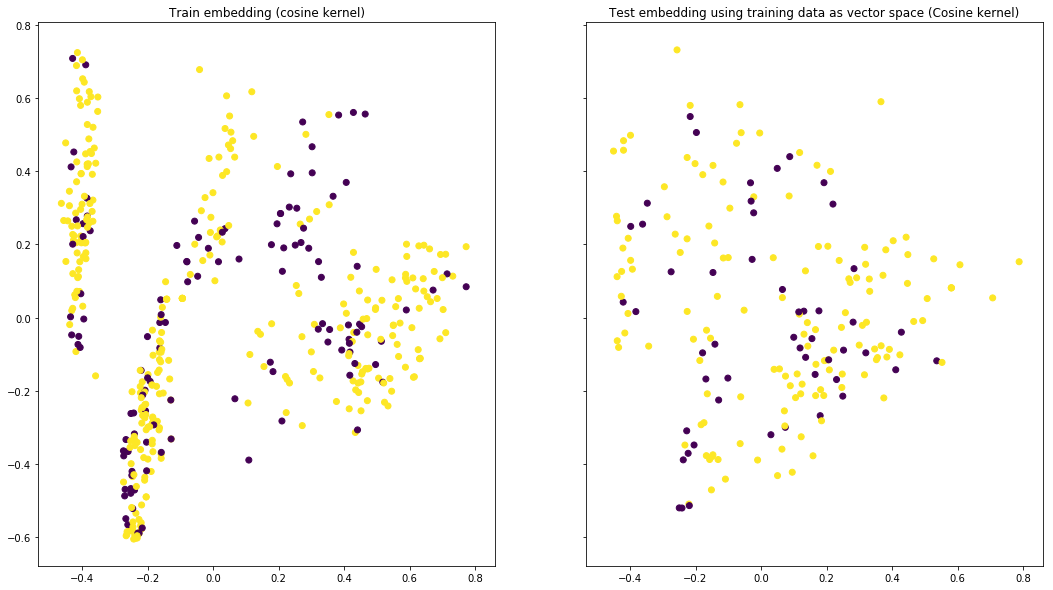

In [108]:
outcome = pd.read_csv("/var/www/datasets/state_and_outcome.csv")
outcome = outcome[["posOutcome","patient_ID"]]

train_emb_plot = pd.merge(emb_train_cosine, outcome[outcome["patient_ID"].isin(emb_train_cosine["patient_ID"])], on="patient_ID")
test_emb_plot = pd.merge(emb_test_cosine, outcome[outcome["patient_ID"].isin(emb_test_cosine["patient_ID"])], on="patient_ID")

fig, axs = plt.subplots(1, 2, figsize=(18,10), sharex='all', sharey='all')
ax1, ax2 = axs[0], axs[1]

ax1.scatter(train_emb_plot[0], train_emb_plot[1], c = train_emb_plot["posOutcome"])
ax2.scatter(test_emb_plot[0], test_emb_plot[1],c = test_emb_plot["posOutcome"])
ax1.set_title('Train embedding (cosine kernel)')
ax2.set_title('Test embedding using training data as vector space (Cosine kernel)')

In [ ]:
### sigmoid

In [111]:
emb_train_sigmoid = do_kpca_rbf(ppty_vector_train, kernel="sigmoid")
emb_test_sigmoid = do_kpca_rbf(ppty_vector_test, test_data=True, vec_space=ppty_vector_train, kernel="sigmoid")

Text(0.5, 1.0, 'Test embedding using training data as vector space (sigmoid kernel)')

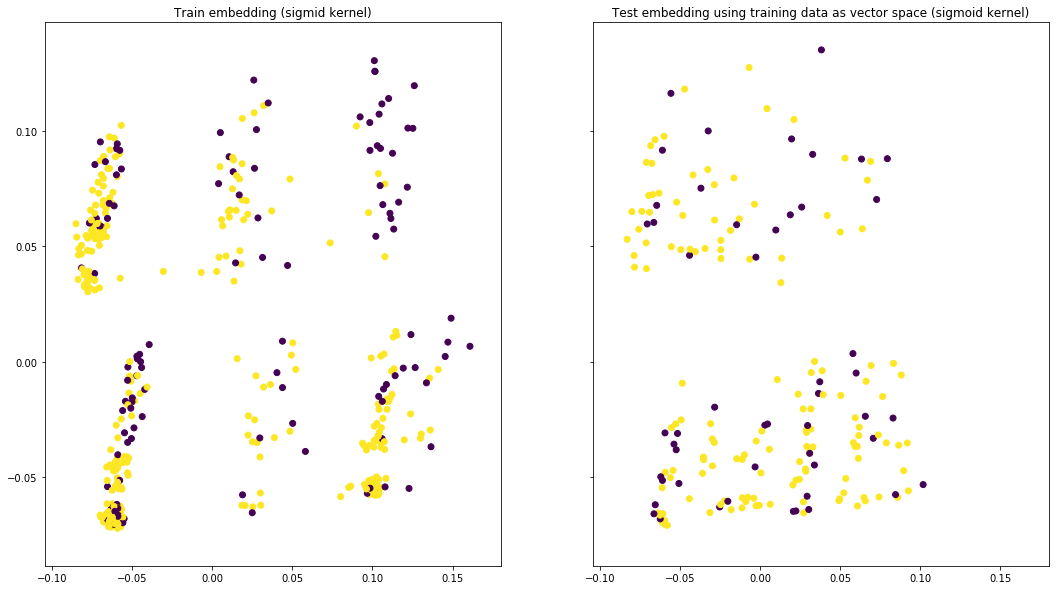

In [112]:
outcome = pd.read_csv("/var/www/datasets/state_and_outcome.csv")
outcome = outcome[["posOutcome","patient_ID"]]

train_emb_plot = pd.merge(emb_train_sigmoid, outcome[outcome["patient_ID"].isin(emb_train_sigmoid["patient_ID"])], on="patient_ID")
test_emb_plot = pd.merge(emb_test_sigmoid, outcome[outcome["patient_ID"].isin(emb_test_sigmoid["patient_ID"])], on="patient_ID")

fig, axs = plt.subplots(1, 2, figsize=(18,10), sharex='all', sharey='all')
ax1, ax2 = axs[0], axs[1]

ax1.scatter(train_emb_plot[0], train_emb_plot[1], c = train_emb_plot["posOutcome"])
ax2.scatter(test_emb_plot[0], test_emb_plot[1],c = test_emb_plot["posOutcome"])
ax1.set_title('Train embedding (sigmid kernel)')
ax2.set_title('Test embedding using training data as vector space (sigmoid kernel)')

In [ ]:
#### Gaussian kernel

In [38]:
emb_train_rbf = do_kpca_rbf(ppty_vector_train)
emb_test_rbf = do_kpca_rbf(ppty_vector_test, test_data=True, vec_space=ppty_vector_train)

In [39]:
outcome = pd.read_csv("/var/www/datasets/state_and_outcome.csv")
outcome = outcome[["posOutcome","patient_ID"]]

Text(0.5, 1.0, 'Test embedding using training data as vector space (Gaussian kernel)')

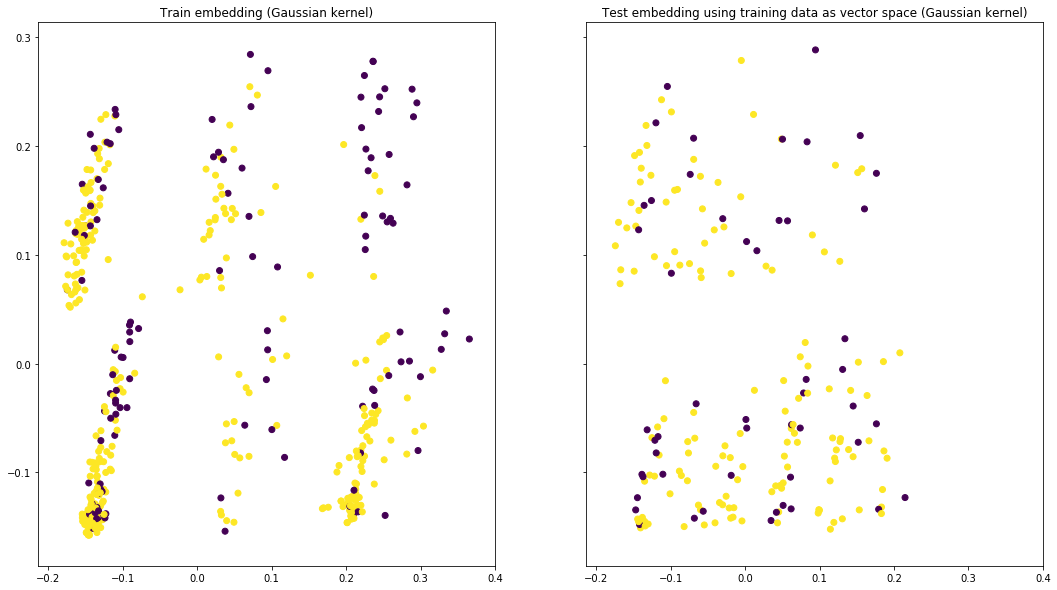

In [44]:
train_emb_plot = pd.merge(emb_train_rbf, outcome[outcome["patient_ID"].isin(emb_train_rbf["patient_ID"])], on="patient_ID")
test_emb_plot = pd.merge(emb_test_rbf, outcome[outcome["patient_ID"].isin(emb_test_rbf["patient_ID"])], on="patient_ID")

fig, axs = plt.subplots(1, 2, figsize=(18,10), sharex='all', sharey='all')
ax1, ax2 = axs[0], axs[1]

ax1.scatter(train_emb_plot[0], train_emb_plot[1], c = train_emb_plot["posOutcome"])
ax2.scatter(test_emb_plot[0], test_emb_plot[1],c = test_emb_plot["posOutcome"])
ax1.set_title('Train embedding (Gaussian kernel)')
ax2.set_title('Test embedding using training data as vector space (Gaussian kernel)')

In [84]:
emb_all_rbf = pd.merge(emb_train_rbf.append(emb_test_rbf), outcome, on="patient_ID").dropna()

In [85]:
val_rbf, test_rbf = do_train_val_test(emb_all_rbf.set_index("patient_ID").astype("float64"),scoring="balanced_accuracy", scale_pos_weight=True, train=emb_train_rbf["patient_ID"].tolist(),test=emb_test_rbf["patient_ID"].tolist())

---- Do parameter tuning
Scoring parameter balanced_accuracy
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    4.3s
[Parallel(n_jobs=12)]: Done 125 out of 125 | elapsed:   31.7s finished



 Time taken: 0 hours 0 minutes and 35.01 seconds.
Best Score: 68.121%
{'max_depth': 6, 'min_child_weight': 2, 'subsample': 0.8, 'max_delta_step': 2, 'gamma': 5, 'learning_rate': 0.02, 'colsample_bytree': 0.8, 'scale_pos_weight': 0.36, 'n_estimators': 300}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.9s finished


--- Validation score
balanced_accuracy    0.681212
recall_0             0.533333
precision_0          0.527552
recall_1             0.829091
precision_1          0.830429
auc                  0.711859
dtype: float64
tn: 7, fp:44, fn:12, tp:130
[[  7  44]
 [ 12 130]]
--- Test score
balanced_accuracy      0.526374
recall_0               0.137255
precision_0            0.368421
recall_1               0.915493
precision_1            0.747126
auc                    0.566556
False_positive_rate    0.862745
False_negative_rate    0.084507
dtype: float64


### PCA dimention reduction

In [99]:
train_emb_pca = do_pca(ppty_vector_train)

In [100]:
test_emb_pca = do_pca(ppty_vector_test, test_data=True, vec_space=ppty_vector_train)

Text(0.5, 1.0, 'Test embedding using training data as vector space PCA')

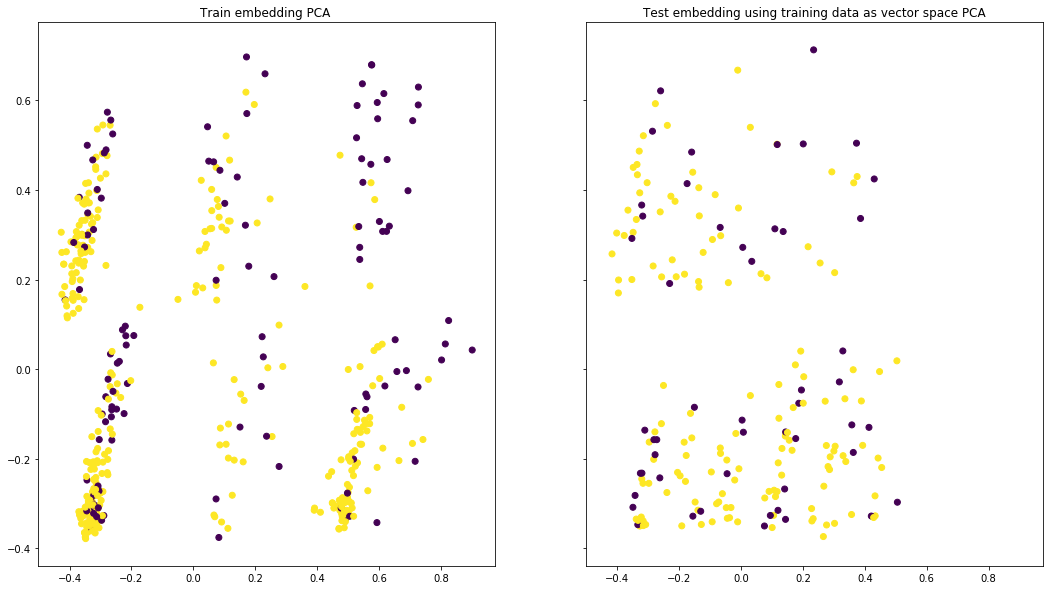

In [104]:
train_emb_plot = pd.merge(train_emb_pca, outcome[outcome["patient_ID"].isin(train_emb_pca["patient_ID"])], on="patient_ID")
test_emb_plot = pd.merge(test_emb_pca, outcome[outcome["patient_ID"].isin(test_emb_pca["patient_ID"])], on="patient_ID")

fig, axs = plt.subplots(1, 2, figsize=(18,10), sharex='all', sharey='all')
ax1, ax2 = axs[0], axs[1]

ax1.scatter(train_emb_plot[0], train_emb_plot[1], c = train_emb_plot["posOutcome"])
ax2.scatter(test_emb_plot[0], test_emb_plot[1],c = test_emb_plot["posOutcome"])
ax1.set_title('Train embedding PCA ')
ax2.set_title('Test embedding using training data as vector space PCA')